# Inscriptions as data: digital epigraphy in macro-historical perspective 

### Petra Hermankova
Author. Aarhus University, [ORCID: 0000-0002-6349-0540](https://orcid.org/0000-0002-6349-0540)

### Vojtech Kase
Author. Aarhus University, [ORCID: 0000-0002-6601-1605](http://orcid.org/0000-0002-6601-1605)

### Adela Sobotkova
Author. Aarhus University, [ORCID:0000-0002-4541-3963](https://orcid.org/0000-0002-4541-3963)

As short texts written on a durable medium, inscriptions represent invaluable insight into past societies, their organization, cultural norms and practices. Several hundred thousand inscriptions in Greek and Latin language survived until today, providing us with a line of evidence concerning populations of large cities and rural communities of the entire Mediterranean Basin in the period between the eighth century BC and eighth century AD. Although published inscriptions have been near-completely digitized and exist in online databases, and open computational tools exist to handle large datasets, large-scale and comparative studies of inscriptions are still rare. Numerous technical and conceptual issues, such as the inconsistent resolution of spatial and temporal attributes or the incompatibility of data structures between datasets, hinder the aggregation and analysis of thousands of inscriptions. The incomplete, uncertain and complex nature of inscriptions as a historical source required us to develop a series of custom open-source tools and reproducible pipelines, enabling a macro-scale overview of epigraphic production in time and space. To illustrate the potential of quantitative studies in epigraphy, we harvest and render comparable two well-established, yet very distinct, digital collections for Latin epigraphy: *Epigraphic Database Heidelberg (EDH)*, containing over 81,000 records and *Epigraphische Datenbank Clauss-Slaby (EDCS)* with over 500,000 records. Placing the datasets side-by-side, we contrast past interpretations of epigraphic habit based on limited samples with trends derived from all available data and discuss their strengths and shortcomings of each respective dataset. We assert that research communities stand to gain from extending digital infrastructures to reduce barriers to access with packages of open and reusable research tools.

digital epigraphy; quantitative research; FAIR science; reproducibility; digital history; Latin inscriptions; epigraphic production

**GitHub repository**

https://github.com/sdam-au/digital_epigraphy

**Data Source**

EDH dataset: 
1. https://sciencedata.dk/public/b6b6afdb969d378b70929e86e58ad975/EDH_text_cleaned_2021-01-21.json or 
2. https://zenodo.org/record/4888168

EDCS dataset: 
1. https://sciencedata.dk/public/1f5f56d09903fe259c0906add8b3a55e/EDCS_text_cleaned_2021-03-01.json or
2. https://zenodo.org/record/4888817

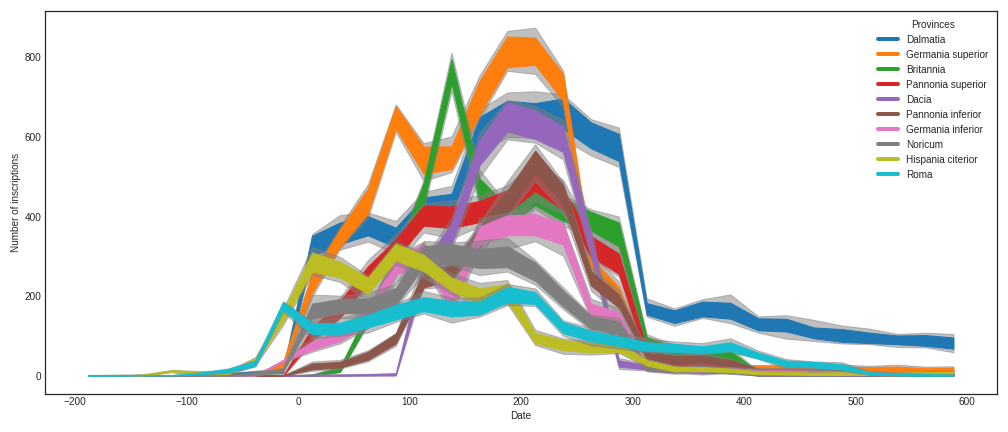

In [1]:
from IPython.display import Image, display
metadata = {
    "jdh": {
        "module": "object",
        "object": {
            "type": "image",
            "source": [
                "Trends of epigraphic production in Roman Provinces between 200 BC and AD 600, based on Epigraphic Database Heidelberg dataset",
                "Petra Hermankova, Vojtech Kase, Adela Sobotkova, 2021"
            ]
        }
    }
}
display(Image("Epigraphic_production_provinces_EDH.png"),
        metadata=metadata)  # test the placeholder cover image

In [2]:
%%capture
# install Python libraries
!pip install sddk tempun scipy seaborn nltk rpy2 cite2c geopandas cite2c

In [3]:
import geopandas as gpd
import cite2c
import requests
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from scipy.stats import trapz
import scipy
import nltk
import json
import tempun
import sddk
import numpy as np
import pandas as pd
pd.options.display.max_columns = 1000  # to see all columns

Matplotlib is building the font cache; this may take a moment.


In [4]:
# cite2c module for bibliographies

!pip install cite2c
!python3 -m cite2c.install

Installing nbextension ...
Enabling the nbextension ...
Enabling the server extension ...
Done.


## Introduction
Ancient inscriptions represent an idiosyncratic category of evidence on past societies, straddling the divide between textual accounts and archaeological artefacts. Close-reading methods dominated early studies of inscriptions, with the aim to reconstruct the text, date and interpret the inscriptions. As the body of evidence grew, synthetic analyses started to emerge to investigate larger-scale patterns (MacMullen 1982; Meyer 1990; Woolf 1996; Hedrick 1999; Nawotka 2021). Digitized epigraphic data made it possible to tackle topics such as the evolution of demographic trends, economic development, migration patterns, changes of the socio-political organization and cultural development using distant-reading and other computational techniques (Wilson 2012; Wilson and Flohr 2016; de Ligt and Tacoma 2016; Hanson et al. 2017; Liuzzo 2019). While these computational studies underscore the potential of epigraphic evidence, they rarely use a dataset larger than several thousand records. Greek and Latin inscriptions, however, count hundreds of thousands spanning the Roman Empire spatially and temporally. In this respect, epigraphic datasets can inform large-scale comparative studies of the dynamics of past societies (Morris 2010; Morris 2013; Turchin and Scheidel 2009; Mullins et al. 2018; Turchin et al. 2018; Ober 2015).

Currently, such a large-scale study has been beyond the reach of any individual researcher because of the gargantuan efforts of aggregating and streamlining the thousands of inscriptions to make analysis feasible. Even the exact number of ancient inscriptions, dating between 800 BC and 800 AD, currently estimated at 600,000 surviving Latin and Greek ones, remains elusive (Bodel 2001, 4; Beltrán Lloris 2014, 135). Although numerous analogue and digital corpora exist, their contents and structure overlap to a variable degree and are not straightforward to combine. Some collections focus on specific language, mostly Latin- or Greek-language inscriptions, or collate all inscriptions from a distinct modern or ancient geographic area regardless of language. Others focus on a particular chronological period. While the challenge of technical data wrangling and distant-reading the inscriptions may be beyond a single researcher, a collaborative team equipped with both the necessary computational tools and domain-specific skill set may get further. Working from established digital repositories and building our digital toolkit on the go, we try to address the variability and fluctuation of epigraphic production in different times and places of the Roman Empire and the dependency of comparative research on the state of modern-day research infrastructure.

## Epigraphic Habit(s) 40 years later: can we do any better?
Inscriptions vary significantly in form and contents, touching almost all aspects of life in an ancient society. Commissioning an inscription was part of a long-term cultural practice that served as a physical response to a change of circumstances, i.e. death, birth, change of legal status, social rank, physical appearance or they can serve as a reminder or reflection of historical events. The inscribed texts range from short private messages on objects of daily use to extensive regulations and codes issued by a political authority, to monumental inscriptions helping to create a public image and build social prestige. In contrast with literary texts, which survived via multiple copying and editing, the text of inscription has the original unaltered form with original typographical and grammatical errors, being an ideal study subject for historical linguists and historians. The information preserved via inscriptions has potentially broader demographic coverage than literary texts, as social groups producing inscriptions were of more diverse socio-economic and cultural background than those of literary texts (Bodard 2008). Inscriptions aggregated into empire-wide collections can thus serve as a proxy for state power, economic health, building productivity, or population trends or as complementary evidence to coin hoards, shipwrecks and other proxies (Bowman and Wilson 2009; Duncan-Jones 1990).


Working at the province level with a couple of thousand inscriptions, scholars have started constructing regional diachronic overviews of epigraphic production. Comparative studies between North Africa, Gaul or Greece revealed that epigraphic production in these provinces follows the same diachronic pattern. Inscription numbers peak at the end of the second century AD, during the reign of Septimius Severus (AD 193 - AD 211), and decline abruptly at the beginning of the third century AD (MacMullen 1982; Meyer 1990; Woolf 1996). Researchers started exploring different drivers for such convergence, from the role of funerary habits to the popularity of public status display to the democratization of citizenship. Elizabeth Meyer, for example, saw the *Constitutio Antoniniana* in AD 212 as the turning point for epitaph production. Once all inhabitants of the Roman Empire had been granted Roman citizenship, being a Roman citizen lost its prestige and the incentive to commission funerary inscriptions to mark one's status vanished (Meyer 1990, 78-81). Such explanations, however, were based on a few regional datasets and of one category of inscriptions. Since the time of Meyer or Macmullen, many scholars have attempted to study epigraphic production at the scale of the Roman Empire but found that such efforts were technically entailed (e.g., Hedrick 1999; Trout 2009; Beltrán Lloris 2014; Bolle et al. 2017; Nawotka 2021; Blanco Pérez 2021). First, constraints on interoperability hindered the integration of numerous digital datasets. Second, the volume and diversity of epigraphic data proved challenging to handle and reconcile. Third, analysis was hampered by the inability to quantify the number of inscriptions at any point in time (Beltrán Lloris 2014, 139; Elliott 2014, 80-83; De Santis and Rossi 2018).

Although the analysis of a large body of digitized texts may seem relatively straightforward from an outsider's point of view, epigraphic datasets pose numerous technological, methodological and even ethical challenges to digital research. What are these constraints, and how do they shift as we move from a thousand inscriptions to several hundred thousand? For large-scale analysis, datasets need to include information on the chronological period and the findspot of each monument in a compatible format to be readily combined. The aggregated datasets should provide representative coverage for a project study area (Wilson 2009, 75). The final aggregate needs to be machine-readable and consistent across columns. The problem with computers is that they do not readily understand `120AD` and `AD120` and `AD 120` to be the same thing. These differences need to be normalized (unified into one canonical form) else the analysis halts, or worse, yields misleading results. When handling a dataset of thousand records, the few variants that occur can be cleaned manually. When handling tens of thousands of records from multiple sources with different formatting, the number of variations becomes so high that it is tractable only with Regular Expressions and other automated validation tools. For spatio-temporal patterns, temporal and spatial attributes often need validation and modelling to account for uncertainty, which is a more entailed process than streamlining the spelling of vocabularies in a list of standardized descriptors. Concepts and meanings need to be mapped and related among datasets to make meaningful analysis possible. Computer-assisted analysis (e.g. distant reading) of fragmented texts hinges on the reconciliation of alterations to the Leiden editorial standard, see ([hermeneutics, Step 2.3](LINK TBA)). Furthermore, researchers need to develop their tools and pipelines to tackle the idiosyncrasies of epigraphic monuments as standard Natural Language Processing pipelines trained on literary data do not work on the texts of inscriptions. 

After the initial - primarily technical - obstacles of wrangling a large quantity of epigraphic evidence into a compatible machine-readable format, conceptual obstacles emerge. The most common obstacle, which affects most historical and archaeological data, yet the hardest one to tackle, is the paucity of high-resolution dates and the need to inventively work with chronological assignment.

We take two well-established digital resources and develop a pipeline that allows us and others to combine and reconcile differences between them. These datasets come from two distinct projects: [Epigraphic Database Heidelberg](https://edh-www.adw.uni-heidelberg.de/) (EDH), a flagship resource for Latin epigraphers and a pioneering initiative in the field of open and FAIR epigraphy with over 35 years of development; and [Epigraphic Database Clauss-Slaby](http://www.manfredclauss.de/) (EDCS), the most extensive digital catalogue of Latin inscriptions, with over 500,000 texts. Before we tap the potential of inscriptions, however, we need to understand the strengths and weaknesses of this class of evidence and be aware of its biases. We, therefore, focus on the distribution of inscription data across the Empire, to decouple the data from social phenomena it may correlate with and build a foundation for other interpretive studies. We inspect inscription frequencies through time and across space and evaluate the representativeness and suitability of each dataset for different research designs.

Following the open science practices (Lowndes et al. 2017), we use reproducible programmatic methods throughout the data aggregation and analysis. Each step in the data collection and streamlining is transparent and documented. All project stages are accessible via public repositories on the Social Dynamics in the Ancient Mediterranean Project [(SDAM) GitHub](https://github.com/sdam-au) and Zenodo under CC-BY-SA 4.0 International license.  

## Data sources

We have chosen two well-established digital sources for Latin inscriptions, [Epigraphic Database Heidelberg](https://edh-www.adw.uni-heidelberg.de/) and [Epigraphic Database Clauss-Slaby](http://www.manfredclauss.de/), in order to demonstrate the range of challenges a digital historian has to face when doing comparative historical research, starting from the incompatibility of digital resources, through the technical issues of wrangling several hundred thousands of data points, to the imperfect state of the historical datasets. Although both projects collect Latin epigraphic data and publish them on the web, they implement different approaches to data structures, encoding, sharing and reuse. The following section describes these differences, especially in encoding of the spatial and chronological attributes and transcriptions of the epigraphic text, that most impact our quantitative analysis.



### Epigraphic Database Heidelberg 

The Epigraphic Database Heidelberg ([EDH](https://edh-www.adw.uni-heidelberg.de/)) represents the flagship digital resource for the discipline of digital epigraphy with over 35 years of development and meticulously curated content (Hartmann 2018). EDH was established by Prof. Géza Alföldy in 1986 and funded by the Gottfried-Wilhelm-Leibniz-Preis (DFG), which the Heidelberg Academy of Sciences took over in 2013. The EDH dataset in 2021 counted over 81,000 inscriptions dating from the sixth century BC to the ninth century AD and covering most of the area of the former Roman Empire.

#### Accessing EDH
EDH is one of the pioneers of digital and open epigraphy, providing high standard and accessible digital resources. The original [aim of the project](https://edh-www.adw.uni-heidelberg.de/projekt/konzept) financed by the Heidelberg Academy of Sciences and Humanities is “to render the epigraphic documentation of the provinces of the Roman Empire as completely and reliably as possible for online research work”. Following the FAIR data principles, the entire EDH Open Data Repository can be reused under the CC BY-SA 4.0 [licence](https://edh-www.adw.uni-heidelberg.de/data) making it an ideal candidate for quantitative research on epigraphic trends in the Roman Empire. The entire dataset is accessible programmatically via a public API ([Application Programming Interface](https://edh-www.adw.uni-heidelberg.de/data/api); Grieshaber 2019). Alternatively, researchers can access the data in raw EpiDoc format, an XML/TEI standard created by the team around Tom Elliott and Hugh Cayless (Elliott et al. 2020). The data is also available via [Zenodo](https://zenodo.org/record/3575155#.YJU9JHUzZhE) and [GitHub](https://github.com/epigraphic-database-heidelberg/data) archive. However, only the API contains the most updated version of the data and will do so until the end of 2021. The phase of active data entry will finish in December 2021, when the project will close (Feraudi-Gruénais and Grieshaber 2016). The accessibility of the dataset after 2022 ensures the release of the data archives through [Zenodo](https://zenodo.org/record/3575155#.YJU9JHUzZhE) and [GitHub](https://github.com/epigraphic-database-heidelberg/data).

The EDH API provides direct access to the latest data, consisting of 11 attributes providing spatial and temporal information, information about the inscribed object, the text of an inscription, its typological categorization, bibliographical references and links to related digital sources and photos. Geospatial data is stored separately in the Geo API and all the individual EpiDoc XML/TEI files with raw data. In June 2019, the authors claimed the database contained over 1.4 million metadata fields in total, averaging 18 attributes per inscription (Grieshaber 2019, 3). As of September 2020, the EDH contained over 81,476 inscriptions, almost 40,000 photographs, 30,000+ locations and over 16,000 bibliographical publications.

EDH uses the standardized vocabularies created between 2013-2015 by the [EAGLE Europeana Project](https://www.eagle-network.eu/resources/vocabularies/) and adopted by the Epidoc community to denote a type of an inscription, inscribed object, material, presence or absence of decoration. One attribute can contain only one record, i.e. predominant type of an inscription or one type of material, however the associated description contains unconstrained text both in German and English. 

We extracted data from EDH on 22 September 2020 via the APIs, and the XML/TEI dumps linked on the project’s website and created a dataset for the purpose of quantitative study. After initial streamlining and cleaning, our dataset contains 81,476 records, each subdivided into 74 attributes containing combined textual and geospatial information and the text of an inscription. We discuss the entire process of access and transformation of the dataset and our custom technological solutions in detail in the [hermeneutics section](TBA).

#### Spatial information in EDH
To evaluate the spatial distribution of inscriptions across the Roman Empire, we need each record to have machine-readable spatial information. This information can be in various formats, with the most readily usable being a pair of coordinates (Latitude, Longitude) representing a discrete location on the surface of the Earth. Where possible, the locations are linked to established LOD spatial gazetteers, such as [Trismegistos](https://www.trismegistos.org/index.php) or [Pleiades](https://pleiades.stoa.org/) for ancient places, or [Geonames](https://www.geonames.org/) for modern places.

EDH contains spatial information in both textual and true geospatial format. Textual data have been digitized from the printed account of a findspot in the original publication, *editio princeps*. After digitization, the spatial information was organized and subdivided into one or more attribute fields, such as 'name of ancient settlement', 'Roman province', 'modern country', 'region of modern place name', or alternatively 'place of the present location' of the inscription. When feasible, geospatial coordinates were generated from these attributes and stored in the `coordinates` attribute. The spatial information level is highly variable in the database, as it depends on individual object history, circumstances of discovery, and the contemporary method of documenting spatial uncertainties.

The ancient name of the place where an inscription was recovered appears in a text field in 83.5 % of EHD records. The attribute `findspot_ancient` in its raw form contains 3613 unique text strings, including notations of uncertainty ("?") or textual indicators of spatial fuzziness, such as "nearby” (bei), "in the vicinity of" (aus), "in between" (inter, zwischen), for details see the [hermeneutic section 2.2]. By extracting the textual indicators of uncertainty during the cleaning process, we narrowed down the total number of unique ancient findspots to 2342, for details see the [hermeneutics section](TBA). While the name of an ancient findspot is useful for contextual socio-historical studies, the textual format is unsuitable for spatial analysis.


In contrast with the `findspot_ancient` attribute, the `coordinates` column in EDH is consistently formatted and can be used with minimal wrangling. It contains a pair of decimal coordinates, separated by a comma, which can be readily mapped. In the EDH, 97 % of records (79,012) contain valid coordinates. Only in 3 % of records (2,464 inscriptions), geospatial coordinates are missing. 

The inscriptions in the EDH come from 54 modern countries, corresponding to 65 Roman provinces, covering the entire Roman Empire and neighbouring regions. As per [EDH website](https://edh-www.adw.uni-heidelberg.de/home/), not all the provinces in EDH have the same state of data entry: in some provinces, all known and published inscriptions were entered, such as Italic provinces, while in others the records contain only provisional and incomplete information and need to be finalized, e.g. provinces in Asia or Africa.

When considering the spatial distribution and representativeness of EDH data, it is worth noting that EDH primarily focuses on collecting data from Roman provinces and it subsamples inscriptions from the city of Rome. This is because there are numerous other databases whose single focus is on the epigraphic remains from Rome, such as Epigraphic Database Roma [(EDR)](http://www.edr-edr.it/en/present_en.php), or subsequently EDCS that draws data from EDR. According to the EDR website, there are more than 34,000 inscriptions from Rome itself, but EDH contains only 4393 inscriptions from the province `Rome`.

#### Chronological information in EDH
Chronological information is in the EDH database distributed across six attributes, either as textual or numeric values representing the most probable date of an inscription. The date is stored as an interval between the two points in time, represented by the attributes `not_before` and `not_after`. For computational reasons and ease of use, all the dates in EDH have been transformed into four digits numerals, representing a year, e.g. `-0143` stands for 143 BC, `0036` stands for AD 36. The numerical form enables one to access the dates computationally and, first of all, to study chronological trends of epigraphic production over time.

The `not_before` attribute represents the earliest possible year when the inscription was created and is available for 59,788 (73.38 % of all) inscriptions in the EDH, ranging from 530 BC to AD 901 (excluding the dates from 19th and 20th century AD). The `not_after` attribute stands for the latest possible year when the inscription was created and is available for 56,281 (69.08 % of all) inscriptions, covering the time range from 503 BC to 950 AD, excluding the 16th and 20th-century outliers. The total of 56,281 inscriptions (69.08 % of all) contains both numeric attributes, with the average length of the interval between the two dates 120.5 years.

For most of the inscriptions, the database does not provide any additional information on how precise the date is or which dating method was used to determine the exact date. The original EpiDoc XML/TEI files provide a reference to a dating system used, such as the Julian calendar, but any other details are not provided. The attribute `commentary` provides chronological information only sporadically, and if so, then only as unconstrained text that is computationally difficult to standardize. Thus, we have to trust the editors of the original volumes and the responsible personnel from the EDH team and use the data in the form provided.

#### Textual information in EDH
The text of an inscription is available to 81,473 records, representing 99,99 % of the entire dataset. The text contained many symbols and editorial marks preventing any meaningful computational analysis of the text. We have created a cleaning pipeline with several different variants offering different levels of 'cleanliness' from faithful to inscription to clean analysis-ready text while maintaining the text's integrity; for details, see the [hermeneutics section](TBA). After the cleaning, the text of all inscriptions in EDH contains between 1.14 and 1.22 million words, depending on the counting function (base R vs [stringr package](https://CRAN.R-project.org/package=stringr) in R).

#### Language of inscriptions in EDH
The vast majority of the 81,476 inscriptions recorded in the EDH database are written in Latin (97.57 % of all inscriptions). Greek inscriptions represent 1.58 %, combined Greek-Latin inscriptions of 0.81 %, and other Mediterranean languages such as Phoenician, Punic, Celtic, Hebrew, Iberian, Italic, Numidian, or Palmyrenic and their combination with mostly Latin. Therefore, the EDH dataset predominantly represents epigraphic cultures publishing in Latin rather than all epigraphic languages of the Mediterranean. We have to bear in mind, the EDH dataset does not provide a representative sample for Greek-writing cultures of the Roman East, although it contains some Latin inscriptions from the Eastern Mediterranean.

### Epigraphik Datenbank Clauss-Slaby

The Epigraphik Datenbank Clauss-Slaby ([EDCS](http://www.manfredclauss.de/)) represents the most extensive digital resource for Latin epigraphy. It contains over 500,000 inscriptions previously published in print or other digital sources, covering the Latin epigraphic production in the entire Mediterranean from the seventh century BC to the 10th century AD. While aware of its limitations, we have specifically chosen the EDCS for its unparalleled spatial and temporal coverage.


#### Accessing EDCS
The original project of Prof. Manfred Clauss and Dr Wolfgang A. Slaby dates back to 1980, and its main goal was to create one digital source for all Latin inscriptions. The project, currently hosted by the Catholic University Eichstätt-Ingolstadt, is constantly being developed, and new inscriptions are being added to the database in 2021 and published in the [EDCS Journal](http://db.edcs.eu/epigr/hinweise/edcs-journal.php?s_language=en). On 12 Dec 2020, the EDCS website stated the database contained 817,455 sets of data, of which 521,696 are inscriptions, 22,232 places and 184,323 datings, combining data from 37 other [digital sources](http://db.edcs.eu/epigr/hinweise/verbindung.html). However, compared to EDH, the metadata in EDCS are reduced to the most basic information such as date or location, prioritizing search function over critical edition (Hartmann 2018).

The license is not as eloquently specified as in the case of EDH, making the data *‘subject to copyright and other laws for the protection of intellectual property’*. The access to the database is via a web interface in English, German, Spanish, French and Italian translations, allowing users to search for predefined attributes, such as province, place, material, date and of course, the text of the inscription. The search results can be only visualised on the website or copied manually one by one. Moreover, if one wants to quote the results of their search, the website does not provide unique identifiers nor preserve the search results in any format. Thus, the web interface is not intended for quantitative research, yet it currently represents the only public access point to the data.

The shortcomings and inconsistencies, most likely caused by the unprecedented size, provide a source of frustration within the epigraphic community (Cooley at al. 2007, 179; Beltran-Lloris 2014, 136; Elliott 2014, 80-81; Lotz 2020). Any comparative study based on the irreproducible output of the web search interface may potentially provide misleading results, without being able to verify them. To provide an example of problematic output, when searched for all inscriptions coming from province Roma (search term `province` = `Roma`), the web search interface states there were 121,165 inscriptions. However, when counting the unique EDCS ID of the output, we have noticed a discrepancy of 30,364 records. The difference output was most likely caused by the rendering limitations of the website or the fact the calculation algorithm displaying the total number of `inscriptions found` on the [EDCS web search interface](http://db.edcs.eu/epigr/epikl_ergebnis.php) draws data from a different source. However, we have noticed this particular issue only in the case of province Roma. In the case of other provinces, the number of unique IDs was corresponding with the calculated total number of `inscriptions found`.

The EDCS web search interface contains 16 attributes providing spatial and temporal information, information about the inscribed object, as well as the text of an inscription, its typological categorisation, bibliographical references and links to related digital sources and photos where available. We accessed the dataset on 9 December 2020 when the [web interface](http://db.edcs.eu/epigr/epi.php?s_sprache=en) contained 500,536 inscriptions in total. We will discuss the details of the access & transformation process in the [hermeneutics section](TBA). 

EDCS does not use standard typologies, as introduced by the EAGLE Europeana Project and EDH. Instead, the categorisation of inscriptions was published on the website in 2017 as `inscription genus` without further documentation explaining the editorial decision behind each category. The [EDCS website](http://db.edcs.eu/epigr/hinweise/hinweis-en.html) states there are 20 categories of `titulorum distributio`, but some of them are linked to the execution or inscribing process rather than to the typology and social function of inscriptions. Thus, we have separated the self-standing attribute `inscr_process`. While EDH provides one type per inscription, a single inscription in EDCS can have multiple labels. Although the EDCS approach is more fitting to the multifaceted functionality of inscriptions in the ancient world, it lacks detailed definitions of the meaning of individual labels and thus limits potential mapping and linking to other digital sources. 

One of the sources that EDCS extracts their data from is also EDH. When we compare both sources, EDCS contains about 91 % (74,313 records) of the inscriptions available in EDH, but with fewer attributes than in EDH. We have created a filtered version of the EDCS dataset without the duplicated records from EDH and named it EDCSx (n= 426,314 inscriptions), so that we can compare the trends of epigraphic production irrelevant to its source. We only removed records that eloquently pointed to EDH as their source, but it is highly likely that some inscriptions in EDCSx may still overlap and exist in both sources (but not exceeding 7,163). 

#### Spatial information in EDCS
Similarly, as in the case of the EDH dataset, EDCS provides spatial information specifying the findspot of an inscription as text-based attributes and as geospatial coordinates. The textual description of the findspot can be broken into several categories, such as the name of an ancient settlement and Roman province. In comparison with EDH, the EDCS dataset provides fewer textual attributes that are often structured differently, making a comparison between the two datasets difficult. EDCS provides textual information describing the findspot for 98 % of records, combining ancient and modern place names into one attribute with varying separators, while EDH breaks down the information into several attributes.

Inscriptions from EDCS come from 62 Roman provinces, covering the area of the Roman Empire and neighbouring areas as visualised on the [EDCS website](http://db.edcs.eu/epigr/imp-rom.html). However, both EDCS and EDH use different labels and breakdown of regions, so any immediate comparison of epigraphic production by Roman provinces becomes entailed, as both terminologies have to be manually mapped onto each other or reconstructed on the basis of geospatial coordinates. Any comparison between EDH and EDCS based on the textual descriptors of location thus becomes computationally complex. EDCS, however, contains Latitude and Longitude, either extracted from the original data source, such as EDH (74,304) or EDR (87,518 records), or from spatial gazetteers such as [Trismegistos](https://www.trismegistos.org/index.php) (1,146 records). The provenance of coordinates is not provided for 251,050 inscriptions (50 %), and thus the method of creation of coordinates and their precision lies directly with EDCS. In total, 486,697 inscriptions representing 97.2 % of the entire EDCS dataset contain attributes Latitude and Longitude in a numeric, and thus computationally accessible, form.

#### Chronological information in EDCS
Chronological information in the EDCS dataset is distributed across three attributes, either as textual description or a numeric value presented as a text string. The EDCS does not provide any additional information on how precise the date is or which dating method was used for most of the texts. In some cases, more than one dating is available, and a variant dating is placed into the same attribute and needs to be computationally separated.

The attributes `dating_to` and `dating_from` represent an interval between the two years when the inscription was created. In 121 cases, the `dating to` attribute contains an alternative dating within the same attribute (as an unconstrained text, with values separated by semicolon). The `dating_from` attribute is available for 163,497, representing 32.7 % of all inscriptions, with most inscriptions being dated between 700 BC to 901 AD. The `dating_to` attribute provides dates for 164,458 inscriptions which corresponds with 32.8 % of the dataset, with the majority of inscriptions dated between 671 BC to 950 AD. Both temporal attributes are present in 163,380 inscriptions (32.6 % of the entire dataset). The average value for the length of the dating interval between `dating from` and `dating to` is 92.25 years, which is approximately 30 years lower than in EDH. While the overall ratio of dated inscriptions in EDCS is substantially lower than in the case of EDH, it still provides more than twice as many data points for temporal study.

To better contrast the differences in temporal trends in EDH and EDCS, for some of our analyses we decided to use the deduplicated EDCSx dataset, with the overlapping records in EDH removed. The EDCSx dataset contains 106,382 dated inscriptions with both start and end date.

#### Textual information in EDCS
Text of an inscription is available for 479,546 inscriptions, representing 95.8 % of the EDCS dataset. The records without text of an inscription were written in languages other than Latin (4.2 %). The text of an inscription contains a large number of characters, special symbols, or comments and notes that prevent application of quantitative text analysis. We had to computationally streamline the text, before proceeding further. The details of the entire process are described in the [hermeneutics section](TBA). The text of all inscriptions in EDCS after cleaning contains between 4.6 and 4.06 million words, depending on the applied counting function (base R vs [stringr package](https://CRAN.R-project.org/package=stringr) in R).

#### Language of inscriptions in EDCS
EDCS focuses primarily on Latin inscriptions, while inscriptions in other languages are recorded unsystematically. The language of the inscription is not recorded as a separate attribute, but rather it is inserted into the text of the inscription as an abbreviation in double-quotes, e.g. `GR`, `ETR`, `PUN` etc. The Latin language is not recorded with the assumption that all inscriptions are Latin unless stated otherwise. In order to count the total number of Latin inscriptions, one has to transform all notations of other languages into a new attribute and count only the records where the language attribute is empty. There is a risk of potentially counting also inscriptions with unknown or not recorded language, but the structure of EDCS does not provide any means to distinguish between truly empty records or records that are written in Latin. The records with an empty language attribute form 95.39 % of the entire corpus, approximately representing the ratio of Latin inscriptions in EDCS.

The second most numerous group in EDCS are inscriptions that contain at least one word in Greek, representing 4.38 % of the entire corpus (21,933 inscriptions) including multilingual texts. The text of the Greek inscriptions is , however, missing, even in the case of bilingual inscriptions (Hartmann 2018). From other language groups, EDCS contains data for inscriptions in Iberian, Etruscan, Punic, Hebraic, Oscan and at least a dozen other languages, but they seem to be recorded rather episodically (less than 0.3 % in total) and without the text of an inscription as well. The contents of EDCS reflect epigraphic traditions of the Latin-writing world throughout the Mediterranean even more strictly than EDH. Such records may serve only as a reminder that some communities were bi- or trilingual, but should not be used to study epigraphic multilingualism or the preferences of publication language.

### FAIRness and utility of EDH and EDCS
Like in many other disciplines there is no single database or federated data source suitable for quantitative analysis of Latin inscriptions. Different datastores co-exist governed by different design principles serving different initial aims. While the EDCS with its 500,000 inscriptions provides the most complete digital collection of Latin inscriptions, it was not designed with quantitative computational research in mind. Anyone wishing to reuse the collection in its entirety first needs to scrape each record from the EDCS in HTML. The limited EDCS documentation on methodological decisions behind the design of the database, most palpable in the multivalued classifications of inscriptions, which need to be streamlined before analysis, pose serious problems for computer-assisted analysis. EDH with its 81,000+ records occupies the other side of the spectrum, having been designed with eye to quantitative methods but lacking the wide coverage of the EDCS. Although EDCS wins in the absolute number of records, EDH greatly exceeds EDCS in the consistent quality and internal organisation of spatial and temporal attributes, information about the inscribed object, modern interpretations and typological classifications, and most importantly the format of the inscription text. The EDH website documents the data structure and clarifies methodological decisions made during data encoding. Reuse options are specified and links to other open datasets of the Ancient Mediterranean are provided, making EDH the go-to epigraphic dataset for quantitative research. While EDCS might seem better due to the bigger data it contains, EDH is the "right" data *sensu* Borgman (Borgman 2015) in this case.

For a more structured overview, we can unpack the FAIR (findable, accessible, interoperable and reusable) acronym from the FAIR data principles and test it against the datasets (Wilkinson et al. 2016). Both EDH and EDCS fulfil the "*F*" component by being findable online, but only EDH fully ticks "*AIR*", being accessible via API or bulk XML/TEI downloads, linking data with other LOD resources, providing metadata and enabling data-reuse under Creative Commons license. EDCS data are published and accessible for free for searching, but any quantitative research requires a third-party tool to extract data in a reusable format (Wilson 2009; Lotz 2020). The next step, interoperability, gets progressively harder to achieve. Defined as *"the ability of data or tools from non-cooperating resources to integrate or work together with minimal effort"*, this state was accomplished in circa six months of work (after a long exploratory stage of scoping and testing different approaches) and required a pipeline through which technical and domain specialists could exchange data back and forth. Once the pipeline existed, we cleaned attributes sufficiently to reconcile and integrate fields relevant for analysis. This cleaning and consultation of attributes facilitated the final stage of reuse, where the resulting datasets were modelled in time and plotted on a map to facilitate comparative analysis. Before actual reuse, however, researchers need to overcome one final barrier. 

## Preparing historical sources for quantitative research
Each researcher who aggregates historical data will sooner or later confront the problem of inconsistent format, variable provenance and precision of spatial and temporal information. The extent of problems such as missing data, spatial error, or wide temporal intervals needs to be evaluated and mitigated as a researcher starts to interrogate the data. Idiosyncratic data formats can constrain possible analyses or have a serious impact on the outcome of quantitative analysis. Data provenance, representativeness and distribution uniformity over sampled areas will affect the robustness of interpretations.

### Spatial precision and sources of error
Both EDH and EDCS datasets provide spatial information on the findspot in the form of angular coordinates formatted as decimal numbers for 97 % of all records. The coordinates are based on the WGS 1984 model of Earth and vary in spatial precision depending on the number of decimals they contain. Some coordinates are specified with zero decimal places, while others can have up to seven decimal places (e.g. 42 or 42.3681563). With each additional decimal place, the spatial precision of the findspot improves. One degree of longitude covers a distance of circa 111 km, depending on roughly where on Earth one is (parallels are longer close to the equator and shorter close to the poles while still running a full circle of 360 degrees). With each additional decimal, the precision of the location increases tenfold, reaching the radius of 1cm precision in seven decimals. When we compare the precision of coordinates between EDH and EDCS, nearly 80 % of EDH records have coordinates with four or fewer decimal digits, while 80 % of EDCS records show coordinates with a minimum of seven decimal places. In sum, 97 % of the EDCS geometries have at least four decimal places in both coordinates.

At face value, EDCS should thus provide more accurate spatial data. Decimal numbers, however, are not the only quality indicator. Textual attributes specifying the original findspot are another indicator, and these are more scarce in EDCS. EDH records may only provide coordinates with precision at the level of metres instead of centimetres, but because they also feature more detailed and structured descriptions of the original findspot, the spatial data seem more robust and reliable. Furthermore, the rigorous review process of EDH, where each record is assigned a responsible editor before publishing, inspires more confidence in data quality. While nearly all present-day coordinates in EDH are derived from major Open Source projects such as Pleiades, Trismegistos or from an internal EDH database of Places ([EDH GeoApi](https://edh-www.adw.uni-heidelberg.de/data/api), only approximately 50 % of all records in EDCS is linked to an external spatial gazetteer or other digital resources. Since EDCS does not provide documentation on how the exact location for the remaining 250,000 inscriptions has been established, we can only guess that they were most likely harvested in bulk rather than created or checked manually one by one, which leaves more space for inaccuracies.

The gathering of absolute coordinates on a large scale only became possible in the last 20 years with the easy availability of consumer-grade GPS. Only 6.9 % of inscriptions in EDH were found after 1980 and 4.3 % after 1990. Most epigraphic corpora, however, define the location of inscriptions as relative to other contemporary places, often topographic or manmade features that may no longer exist today. Such descriptions of relative location had to first be digitised and then georeferenced, i.e. converted to spatial format (Latitude and Longitude) and anchored to some digital spatial model of the world. This was done on the basis of information given by the author of the editio princeps. Creators' spatial skills also played a role in the choice of model and tools, whether manual clicking in desktop GIS software or GoogleMaps and similar web tools or semi-automatically using geocoding.

To circumvent the need to create spatial data, coordinates for well-known ancient sites can often be extracted from the Linked Open Datasets (LOD), such as [Trismegistos](https://www.trismegistos.org/index.php) or [Pleiades](https://pleiades.stoa.org/). These derived single point coordinates, however, were at some point also created by hand and suffer from the same problems as mentioned above. Each point has its own history and is subject to multiple authors and editors. The uncertainty is compounded if coordinates are assigned in bulk via the extraction from LOD databases, where the algorithm assigns the coordinates of the nearest ancient place rather than the exact location specified in the textual description of the findspot. To illustrate the problem with an example, inscription [EDH HD005489](https://edh-www.adw.uni-heidelberg.de/edh/inschrift/HD005489) was found between ancient cities Thamugadi and Lambaesis that are 20 km distant as-crow-flies, but the coordinates extracted from [Trismegistos Places](https://www.trismegistos.org/place/18251) point to the location of Thamugadi instead of a location 10 km west of the city. This is most likely the result of the computer algorithm not being able to interpret the findspot with higher precision than the nearest known ancient or modern site.

Given that services such as Pleiades or Trismegistos refer to larger spatial entities, such as cities or building complexes, coordinates with more than four decimal places convey false precision. The centimetre-level precision can mislead the reader into thinking that the exact location, such as the excavation context of an inscription, is known and was documented with a total station or similar high-precision method. The findspot of an inscription, as represented by the Pleiades or other coordinates, is in most cases much less precise, with the margin of error in the range of several hundreds of metres or few kilometres.

Unfortunately, digital sources only rarely provide further information on the provenance of geospatial data in a structured form accessible to a computer. Until such information on whether the inscription was found *in situ* or in its secondary context, transferred to a church or built into a wall is made available in digital corpora, along with the method of their creation, the coordinates, even with their known biases and limitations represent the best geospatial data at hand.

### Reconciling heterogenous date ranges in inscriptions 
Before anyone can provide a satisfactory answer to what were the main motivations of epigraphic production and why they were more prevalent in certain times or areas, we need to be able to locate inscriptions in place and, most importantly, in time. While the spatial aspect has been solved reasonably well with the use of spatial gazetteers and Linked Open Datasets (LOD), the temporal classification of inscriptions, however, contains a large degree of uncertainty and fuzziness, making any comparative study dependent on computational solutions (Rabinowitz et al. 2018, 203-204).


The epigraphic date represents a modern editorial interpretation of the most probable yet tentative point in time when the inscription was created. The date is determined by the editor based on the available evidence extracted from the inscription itself and contextual links to already existing chronological systems. If the text of an inscription contains a reference to a known calendar system, historical event or person, editors can assign an absolute date, often with the precision of one or several years. In most cases, however, the editor is able to place inscriptions within a relative chronological system on the basis of its textual content, physical medium, form and iconography, style of the lettering, or, where available, archaeological context (Bodel 2001, 49-52; McLean 2003, 149-176; Rabinowitz et al. 2018, 204-205). The relative date is usually less precise than the absolute one as its duration can span over several centuries or periods, such as the Hellenistic, Early Roman period. Taking into account the level of uncertainty when determining the exact date of creation, most of the digital epigraphic sources use a numeric representation of an interval between the two points of time, so-called *terminus post quem* and *terminus ante quem*, delimiting the period of time with the highest likelihood of inscription being created. For example, with the date 212 BC - 150 BC, the editor asserts the inscription was created at one point of time in those 62 years, but given the lack of other evidence, they are unable to narrow that interval down to a single year.

While it is reasonable to plot inscriptions dated to individual years on a temporal axis, the same method cannot be applied to inscriptions with a wide dating interval in order to produce meaningful outputs. Traditionally the chronological comparisons were done by grouping inscriptions by centuries, or 20 or 25-year-long time blocks and counting their total numbers (MacMullen 1982; Meyer 1990; Nawotka 2021, 9). In order to assign an inscription to a predefined time block, such as century, the most common method was to calculate an average value (mean) of the temporal interval. The issue is especially problematic with inscriptions dated on a century basis that represents the most common dating interval (21 % in EDH and 24 % of all dated inscriptions in EDCS). For instance, all inscriptions dated to the second century AD, i.e. dated to the interval from AD 101 to AD 200, are then approached as dated to the year 150 AD. Once there are many inscriptions dated on a century basis, an artificial spike emerges around the mid-century, suggesting there was a higher likelihood of inscriptions being produced in the midsections of the century. Year AD 150, however, in most cases does not correspond with the level of uncertainty the editor of the inscription intended to provide. Should the editor be certain the inscription was created in AD 150, they would have communicated the fact in the first place. Instead, they choose an interval suggesting the inscription was created in any of the 99 years, not towards its middle. To deal with the inflation of dates in mid-intervals, researchers often discarded the inscriptions where the temporal interval was too broad. This method, however led to the loss of a large portion of dated inscriptions, which represents another limiting factor for temporal analysis (Prag 2002; 2011; Korhonen 2011; Nawotka 2021, 22-23; Janouchová (Heřmánková) 2021)

The ability to gauge margins of error and to work with temporal uncertainty is one of the biggest challenges to synthesizing projects that wish to retain as much data as possible for large-scale diachronic analyses. Aoristic sum offers one approach to balance the highly variable temporal resolution of individual inscriptions and to visualize long-term trends. In this method, each inscription gets assigned a probability based on the duration of the date interval within each time block, for example, for each century or for 50-year-long time blocks. The probability weights of all inscriptions are then summed up in the predefined time blocks and plotted on a temporal axis. The aoristic sum method is useful to compare the level of change from one period to another and has been used in archaeology and related disciplines (Johnson 2004; Crema 2012; Verhagen et al. 2016; Oksanen and Lewis 2020). The method is appropriate as far as we are concerned about changes in the total number of inscriptions from one time block to another. However, it proves to be insufficient when we want to combine the temporal analysis with other types of analyses.

To overcome the limitations of the aoristic sum method, we have adopted a Monte Carlo simulation (MCS) approach inspired by recent applications in archaeology (Crema 2012; Crema and Kobayashi 2020). For that purpose, we developed a custom TEMPUN Python package (Kaše 2021, [TEMPUN package](https://pypi.org/project/tempun/)). The MCS approach allowed us to analyse temporal trends in the data in combination with other types of analysis, for example, the spatial distribution of inscriptions in different time periods. Following this approach, we first assigned to each dated inscription 1,000 random dates within its temporal interval. The dates were created randomly but following a uniform distribution, i.e. all years from within the temporal interval were represented with the same level of probability. We have decided to use a uniform probabilistic distribution, assuming the likelihood of inscription being created in the beginning, in the middle, or towards the end of the temporal interval was constant. For an inscription dated in the period between 212 BC and 150 BC, for example, the probability of being created in 202 BC, 199 BC, 175 BC, or 150 BC is the same and does not change with time. We have then recombined the random dates 1,000 times into a time series, each of which contains all inscriptions dated to one singular year within their creation interval. These 1000 time series were subsequently plotted individually, creating a cumulative curve with the temporal axis (x) using 25-year-long time blocks. This cumulative plot reveals not only the count of inscriptions over time (variation along the y axis) but also the extent of temporal uncertainty associated with each time block, shown in the width of each curve. The width of the band/line reflects the spread of all the 1000 simulated counts, with the upper limit representing a maximal count of inscriptions for a given time block, the lower limit being a minimum count.

In order to demonstrate the usefulness of the MCS method and the Tempun package, we compare the epigraphic production of EDH and EDCS in time and space, focusing on some of the general trends of epigraphic production within the Roman Empire, alongside changes of the dominant function and use of inscriptions. 

## Quantifying the Epigraphic Habit, in Space and Time

Now that we are able to quantify the number of inscriptions per arbitrary period of time, what new insights do our datasets bring to the topic of epigraphic production? Does the epigraphic production rise and fall around AD 200 across the entire Empire or only in some of the provinces? 

In [5]:
# Loading the EDH dataset from public folder on Sciencedata.dk using sddk package

publicfolder = "b6b6afdb969d378b70929e86e58ad975"
EDH = sddk.read_file("EDH_text_cleaned_2021-01-21.json", "df", publicfolder)
EDH.head(1)

reading file located in a public folder


responsible_individual type_of_inscription letter_size not_after  \
0                Feraudi             epitaph    3.2-2 cm      0130   

                                          literature  work_status height  \
0  AE 1983, 0192.; M. Annecchino, Puteoli 4/5, 19...  provisional  33 cm   

                                     diplomatic_text  \
0  D M / NONIAE P F OPTATAE / ET C IVLIO ARTEMONI...   

                                              people   depth  \
0  [{'name': 'Noniae P.f. Optatae', 'cognomen': '...  2.7 cm   

                   material type_of_monument                province_label  \
0  Marmor, geädert / farbig           tabula  Latium et Campania (Regio I)   

   width                                      transcription country  \
0  34 cm  D(is) M(anibus) / Noniae P(ubli) f(iliae) Opta...   Italy   

                                                 uri findspot_ancient  \
0  https://edh-www.adw.uni-heidelberg.de/edh/insc...       Cumae, bei   

  last_update modern_region findspot_modern language        id  \
0  2014-04-07      Campania       Cuma, bei    Latin  HD000001   

                                   edh_geography_uri  \
0  https://edh-www.adw.uni-heidelberg.de/edh/geog...   

                                          commentary  \
0   (C): 2. Hälfte 1. - Anfang 2. Jh. - AE; Ende ...   

                           trismegistos_uri not_before external_image_uris  \
0  https://www.trismegistos.org/text/251193       0071                  {}   

  fotos         coordinates idno_tm  \
0    {}  [14.0551, 40.8472]  251193   

                                     placenames_refs  \
0  [http://www.trismegistos.org/place/033152, htt...   

                                        text_edition  \
0  Dis Manibus Noniae Publi filiae Optatae et Cai...   

                                origdate_text layout_execution  \
0  71 AD – 130 AD                                           21   

  layout_execution_text support_objecttype support_objecttype_text  \
0            unbestimmt                257                   Tafel   

  support_material     support_material_text support_decoration keywords_term  \
0                   Marmor, geädert / farbig               1000            92   

  keywords_term_text type_of_inscription_clean type_of_inscription_certainty  \
0      Grabinschrift                   epitaph                       Certain   

   height_cm  width_cm  depth_cm material_clean type_of_monument_clean  \
0       33.0      34.0       2.7         Marble                 tabula   

  type_of_monument_certainty          province_label_clean  \
0                    Certain  Latium et Campania (Regio I)   

  province_label_certainty country_clean country_certainty  \
0                  Certain         Italy           Certain   

  findspot_ancient_clean findspot_ancient_certainty modern_region_clean  \
0                  Cumae                  Estimated            Campania   

  modern_region_certainty findspot_modern_clean findspot_modern_certainty  \
0                 Certain             Cuma, bei                   Certain   

  findspot_clean findspot_certainty origdate_text_clean  \
0           NULL               NULL      71 AD – 130 AD   

                             clean_text_conservative  \
0  D M Noniae P f Optatae et C Iulio Artemoni par...   

                        clean_text_interpretive_word  \
0  Dis Manibus Noniae Publi filiae Optatae et Cai...   

                    clean_text_interpretive_sentence findspot year_of_find  \
0  Dis Manibus Noniae Publi filiae Optatae et Cai...      NaN          NaN   

  present_location religion geography social_economic_legal_history military  
0              NaN      NaN       NaN                           NaN      NaN

In [6]:
# Loading the EDCS dataset from public folder on Sciencedata.dk using sddk package

publicfolder = "1f5f56d09903fe259c0906add8b3a55e"
EDCS = sddk.read_file("EDCS_text_cleaned_2021-03-01.json", "df", publicfolder)
EDCS.head(1)

reading file located in a public folder


EDCS-ID    publication province province_list place place_list  \
0  EDCS-31400030  CIL 03, 12297   Achaia        Achaia     ?          ?   

  end_yr_list notes_dating status_list inscr_type status_notation  \
0          {}                       {}         {}              {}   

  inscr_process notes_references notes_comments inscription  \
0            {}                                       Leius   

  inscription_stripped_final clean_text_interpretive_word Links language  \
0                      Leius                        Leius   NaN      NaN   

  dating from dating to  start_yr  end_yr_1 status Latitude Longitude photo  \
0         NaN       NaN       NaN       NaN    NaN      NaN       NaN   NaN   

  Material Comment  
0      NaN     NaN

To facilitate comparison and remain mindful of data origin, we display the results from all three datasets side-by-side. The datasets include dated inscriptions from the EDH (n=59,788), the EDCS (n=164,452) and the filtered EDCSx dataset (n=106,382) devoid of detectable duplicates with EDH. By subjecting all sources to the same temporal simulation method, we render the data comparable and can now evaluate the pattern and rate of change in epigraphic production across sources as well as per individual provinces or type of inscription.

Figure 1 demonstrates that the pattern of production differs between the EHD and EHCS and EDCSx sources. The light grey boundary shows time series that fall outside of the 95 % confidence interval, while the color itself (blue, red, or green) represents results for time series within the 95 % confidence interval. The thickness of each line indicates the amount of temporal uncertainty in a given time interval, wider suggesting more and narrower line less uncertainty. The thickness of the color lines on Figure 1 (surrounded by relatively narrow areas covered by light grey) signals that on a dataset-wide level there is a relatively low level of temporal uncertainty. It also shows that the impact of temporal uncertainty is inversely proportional to the number of data points in the plotted time series (cf. Figure 4). The EDH dataset follows the trend identified by Woolf and McMullen, while the EDCS peaks at the turn of the millennium and persists until the beginning of the third century when it declines. The EDCSx, representing the EDCS without records duplicated in EDH, shows the peak of epigraphic activity in the first century AD, followed by gradual, yet continuous decline.

In [7]:
# transforming dates in the EDH dataset into numerals
EDH["not_after"] = pd.to_numeric(EDH["not_after"])
EDH["not_before"] = pd.to_numeric(EDH["not_before"])

# How many inscriptions have both dates
EDH_dated = EDH[(EDH["not_before"].notnull()) | (EDH["not_after"].notnull())]
len(EDH_dated)

59788

In [8]:
%%time
# Generate a list of 1000 random dates for each inscription in the dataset

EDH_dated["random_dates"] = EDH_dated.apply(lambda row: tempun.model_date(
    row["not_before"], row["not_after"], size=1000,), axis=1)

CPU times: user 46.7 s, sys: 1.86 s, total: 48.6 s
Wall time: 48.6 s


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# saving as local json
EDH_dated.to_json("../output/EDH_dated.json")

In [ ]:
%%time
# Count random dates in temporal timeblocks in a specified time range (from 200 BC to 600 AD, temporal blocks by 25 years)

EDH_complete_simulations = tempun.timeblocks_from_randoms(
    EDH_dated, "random_dates", [-200, 600, 25])

In [ ]:
# transforming dates in EDCS dataset into numerals
EDCS["start_yr"] = pd.to_numeric(EDCS["start_yr"])
EDCS["end_yr_1"] = pd.to_numeric(EDCS["end_yr_1"])

# how many of the inscriptions have both dates
EDCS_dated = EDCS[(EDCS["start_yr"].notnull()) | (EDCS["end_yr_1"].notnull())]
len(EDCS_dated)

In [ ]:
%%time
# Generate a list of 1000 random dates for each inscription in the dataset
EDCS_dated["random_dates"] = EDCS_dated.apply(lambda row: tempun.model_date(
    row["start_yr"], row["end_yr_1"], size=1000,), axis=1)

In [ ]:
%%time
# Count random dates in temporal timeblocks in a specified time range (from 200 BC to 600 AD, temporal blocks by 25 years)
EDCS_complete_simulations = tempun.timeblocks_from_randoms(
    EDCS_dated, "random_dates", [-200, 600, 25])

In [ ]:
# saving as local json
EDCS_dated.to_json("../output/EDCS_dated.json")

In [56]:
# EDCS contains "Links" column, containing reference to EDH
links_with_edh = EDCS[EDCS["Links"].str.contains(
    "edh", na=False)]["Links"].tolist()
edh_ids = [link.rpartition("edh/inschrift/")[2].split()[0]
           for link in links_with_edh]
len(edh_ids)

74304

In [55]:
# eliminating all inscriptions containing a reference to EDH, i.e. removing duplicate inscriptions recorded in both sources
EDCSx = EDCS[~EDCS["Links"].str.contains("edh/inschrift/", na=False)]
len(EDCSx)

426314

In [57]:
# transforming dates in the EDCSx dataset into numerals
EDCSx["start_yr"] = pd.to_numeric(EDCSx["start_yr"])
EDCSx["end_yr_1"] = pd.to_numeric(EDCSx["end_yr_1"])

# how many of the inscriptions have at least one date
EDCSx_dated = EDCSx[(EDCSx["start_yr"].notnull()) | (
    EDCSx["end_yr_1"].notnull())]
len(EDCSx_dated)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


106382

In [58]:
%%time
# Generate a list of 1000 random dates for each inscription in the dataset
EDCSx_dated["random_dates"] = EDCSx_dated.apply(
    lambda row: tempun.model_date(row["start_yr"], row["end_yr_1"], size=1000,), axis=1)

CPU times: user 1min 2s, sys: 2.73 s, total: 1min 5s
Wall time: 1min 5s


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [60]:
# saving as local json
EDCSx_dated.to_json("../output/EDCSx_dated.json")


In [7]:
# read the datasets back and generate simulations....
EDH_dated = pd.read_json("../output/EDH_dated.json")
EDCS_dated = pd.read_json("../output/EDCS_dated.json")
EDCSx_dated = pd.read_json("../output/EDCSx_dated.json")

In [8]:
%%time
# Count random dates in temporal timeblocks in a specified time range (from 200 BC to 600 AD, temporal blocks by 25 years)
EDH_complete_simulations = tempun.timeblocks_from_randoms(
    EDH_dated, "random_dates", [-200, 600, 25])
EDCS_complete_simulations = tempun.timeblocks_from_randoms(
    EDCS_dated, "random_dates", [-200, 600, 25])
EDCSx_complete_simulations = tempun.timeblocks_from_randoms(
    EDCSx_dated, "random_dates", [-200, 600, 25])

CPU times: user 21.4 s, sys: 462 ms, total: 21.9 s
Wall time: 21.9 s


CPU times: user 1.41 s, sys: 1.37 s, total: 2.78 s
Wall time: 1.61 s


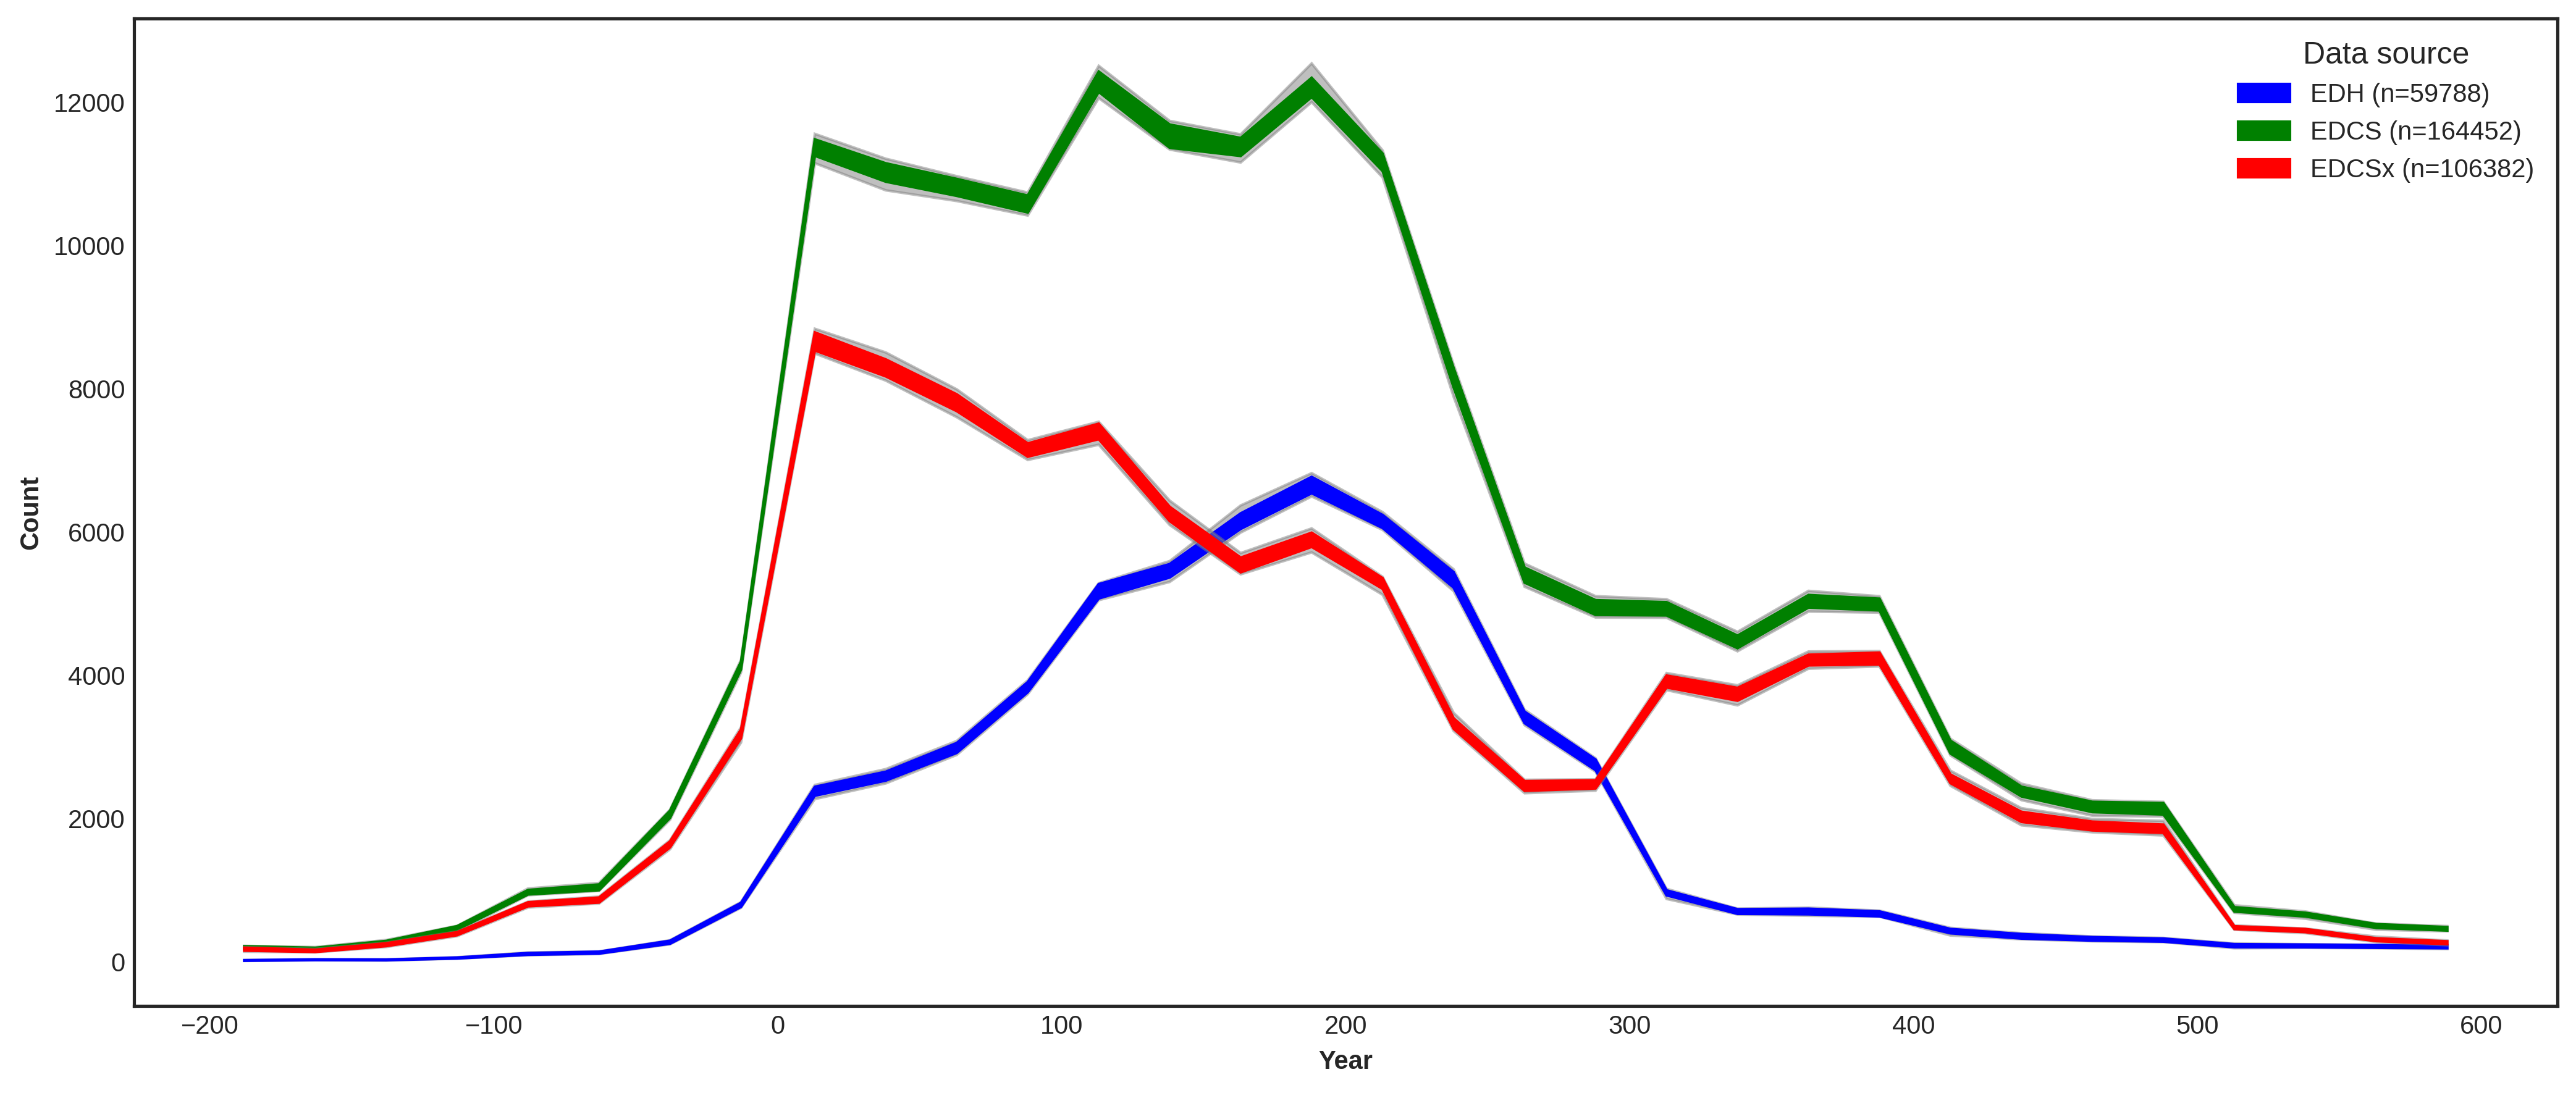

In [9]:
%%time
# Figure 1
# plot all three datasets into one plot comparing the epigraphic production in time

plt.style.use("seaborn-white")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 10

tab_colors_list = list(mcolors.TABLEAU_COLORS.keys())

fig, ax = plt.subplots(figsize=(14, 6), tight_layout=True)

tempun.plot_timeblocks_data(
    EDH_complete_simulations, ax=ax, color="blue", label=f"EDH (n={len(EDH_dated)})")
tempun.plot_timeblocks_data(
    EDCS_complete_simulations, ax=ax, color="green", label=f"EDCS (n={len(EDCS_dated)})")
tempun.plot_timeblocks_data(
    EDCSx_complete_simulations, ax=ax, color="red", label=f"EDCSx (n={len(EDCSx_dated)})")

ax.set_xlabel("Year", weight="bold")
ax.set_ylabel("Count", weight="bold")
#ax.set_title("Total epigraphic production over time (EDCS and EDH compared)")
ax.legend(title="Data source", title_fontsize="large", bbox_to_anchor=(1, 1), loc='upper right')

#plt.axvline(x=212, linewidth=0.5, color = 'orange', linestyle='dashed')

#fig.suptitle(f'Comparison of epigraphic production over time', fontsize=16,fontweight="bold")
plt.savefig('Fig1_Epi_production_time.png')

Fig. 1: Comparison of the epigraphic production from 200 BC to 600 AD. The plot represents the results of 1000 iterations of Monte Carlo simulations per dataset, grouped by 25-year-long time blocks. The blue line represents the dated inscriptions in the EDH dataset (n=59,788), the green line represents the full EDCS dataset (n=164,452), and the red line EDCS without the duplicate records from EDH (EDCSx, n=106,382).

The dated inscriptions in the EDH dataset (n=59,788) styled in blue show a steady growth of epigraphic production from the beginning of the Roman Imperial Period (27 BC) up to the AD 200, with the maximum produced inscriptions around 6,000 per 25 years. The maximum of production in AD 200 is followed by a century of steadily declining production of inscriptions. From AD 300, the numbers of preserved inscriptions in EDH maintained a relatively stable yet slowly declining trend until AD 600 with only a small number of produced inscriptions.

The dated inscriptions in the complete EDCS dataset (n=164,452) in green color slowly rise already in the second century BC, followed by a steep increase in the number of produced inscriptions around the beginning of the Roman Imperial Period (27 BC), producing on average between 10,000 and 12,000 inscriptions per 25 years. The trend of high production remained relatively stable until AD 212 when a sharp decline reduced the production to 50 % in the second half of the third century AD. During the fourth century AD, the epigraphic production fluctuated between 5,000-6,000 inscriptions per 25 years, followed by a drop to approximately 2,000 inscriptions per 25 years in the following century. Another drop in production came around AD 500, after which the production slowly faded away.

However, when we look at the trends in EDCSx (n=106,382), the dataset without the duplicate EDH records, represented by the red color, we see a different trend than in EDCS or EDH. The total levels of production through time are lower in EDCSx dataset than in EDCS, as records shared with EDH were removed. This deduplication made it one third smaller and removed the peak of the Antonine era that dominated the EDH. All in all, epigraphic activity in all three datasets starts in the first century BC, but while EDH shows a slow, gradual increase through the end of the second century AD, EDCSx here follows the EDCS take off and reaches a maximum point nearly instantly. This first and highest peak of epigraphic production under Augustus (27 BC - 14 AD) is followed by a gradual but inexorable decline until the second half of the third century AD. After a brief plateau, the production of inscriptions in EDCSx recovers and starts rising again during the fourth century AD. This new growth in EDCSx, while robust and century-long, nonetheless, never reaches the levels of production from the first and second centuries AD.

The diachronic trends of growth and decline clearly vary between the datasets, partially due to the selection of contents. The production of inscriptions in the Augustan era dominates the EDCS dataset, while the Antonine peak is a global maximum in the EDH. The decline of the epigraphic production in the third century AD, often connected with the socio-economic crisis of the Roman Empire, is observable in both datasets, but while it has a permanent effect on EDH, EDCS, and EDCSx datasets show recovery after AD 300.

While long-term trends across the datasets rise and fall differently through time and differ in magnitude, many of the spikes along these curves are shared and converge around the same dates. Spikes in epigraphic production across the Roman West have been observed in the Augustan era (14 BC - AD 27), the Antonine era (AD 97 - AD 192) and the Severan era (AD 193 - AD 235) (Nawotka 2021, 230). These synchronized spikes, rather than representing actual empire-wide phenomena such as the sudden massive issue of new inscriptions, are likely an artefact of editorial decisions. The authors of the *editio princeps* would often assign the inscriptions the start and the end date coterminous with the boundaries of historical periods such as the Augustan era (14 BC - AD 27), or known historical events, such as the issue of *Constitutio Antoniniana* in AD 212. Established cultural periods were used as meaningful anchors for relative dates. 

All in all, when plotting EDH, EDCS and EDCSx side-by-side in Figure 1, we can see that each dataset yields a different image of the epigraphic production, although they cover the same historical material from the same time periods. In order to better understand the reason behind such differences, we need to explore more closely the contents and the geographic distribution of inscriptions within both sources.

### Aspects of  epigraphic production 
Previous observations on the changing trends in epigraphic production were mostly made on the basis of private inscriptions, specifically funerary texts (MacMullen 1982; Meyer 1990; Woolf 1996). It is unclear whether the observed trends apply to other types of inscriptions (non-private, non-funerary), and so we shall review the diachronic development of inscriptions by their type. 

Distinguishing between private and public epigraphy can be a subjective task. We can categorize inscriptions according to the status of the commissioner (private person vs. public authority), the context of discovery (public building vs. private object) or the intended audience (e.g. forum visitors vs. defixiones), but none of these approaches is bulletproof. For the purpose of this study, we follow the ongoing discussion within the [Epigraphy.info Vocabulary Working Group](https://epigraphy.info/vocabularies_wg/) and use the commissioning entity behind an inscription to make the assignment. Private inscriptions are texts commissioned and executed on behalf of individuals or social groups not acting in the capacity of an institution or in a religious role. This group thus encompasses funerary inscriptions commemorating someone’s death, votive inscriptions celebrating or thanking a deity, ownership inscriptions identifying the owner of the inscribed object, inscriptions connected with the manufacturing process, identifying the maker or the process itself. Public inscriptions, conversely, are inscriptions issued by a person or group of people acting within an institutional or legal role, potentially having an impact on the public sphere. In this category, we can typically find regulatory documents, such as laws and decrees, inscriptions informing of various building activities, milestones, inscriptions delimiting the boundaries, and certifications of social status, such as military diplomas or manumissions. In some instances, the private and public sphere cannot be entirely separated, as the same type was used for monuments published on behalf of a public authority as well as a private individual or social group.

For the purpose of temporal comparison of epigraphic types, we use the subset of dated inscriptions from both datasets: EDH (n=59,788) and EDCSx (n=106,382). Both datasets contain the attribute `inscription_type`, however, its content is mutually incompatible. EDH dataset operates with 22 unique categories if we count only labels stripped of any markers of uncertainty, such as question-mark, associated with the categorisation of an inscription. The EDCSx dataset contains 16 unique categories of inscription type, with an average of 1.08 types per inscription and a maximum of five labels (`inscription genus/titulorum distributio`) per inscription. Moreover, the typological categories of EDH and EDCS do not always correspond to one another, with variants of the former overlapping with several of the categories in the second source. For instance, the category of `owner/artist inscription` in EDH does not exist in EDCS but can be conceptually divided into two categories `tituli possessionis` and `tituli fabricationis`.

In [7]:
%%time
# Inscriptions by their type over time, EDH

simulations_by_type_len_EDH = []

for ins_type in EDH["type_of_inscription_clean"].unique():
    if ins_type != "NULL":
        subset_df = EDH_dated[EDH_dated["type_of_inscription_clean"] == ins_type]
        simulations_by_type_len_EDH.append((ins_type, len(subset_df)))
simulations_by_type_len_EDH = sorted(
    simulations_by_type_len_EDH, key=lambda x: x[1], reverse=True)
simulations_by_type_len_EDH

simulations_by_type_EDH = []

for ins_type_tup in simulations_by_type_len_EDH[:8]:
    subset_df = EDH_dated[EDH_dated["type_of_inscription_clean"]
                          == ins_type_tup[0]]
    simulations = tempun.timeblocks_from_randoms(
        subset_df, "random_dates", [-200, 600, 25])
    ins_type_N = len(subset_df)
    simulations_by_type_EDH.append([ins_type_tup[0], ins_type_N, simulations])
simulations_by_type_EDH = sorted(
    simulations_by_type_EDH, key=lambda x: x[1], reverse=True)

date_vars_by_instypes = []
for ins_type_tup in simulations_by_type_len_EDH[:10]:
    subset_df = EDH_dated[EDH_dated["type_of_inscription_clean"]
                          == ins_type_tup[0]]
    date_vars = []
    for n in range(100):
        date_vars.append(
            [date_var[n] for date_var in subset_df["random_dates"] if date_var != None])
    date_vars_by_instypes.append(date_vars)

CPU times: user 3.16 s, sys: 36.6 ms, total: 3.2 s
Wall time: 3.21 s


In [8]:
simulations_by_type_len_EDH

[('epitaph', 25516),
 ('votive inscription', 13018),
 ('owner/artist inscription', 4224),
 ('honorific inscription', 3576),
 ('building/dedicatory inscription', 3107),
 ('mile-/leaguestone', 1630),
 ('identification inscription', 1377),
 ('acclamation', 470),
 ('military diploma', 410),
 ('list', 328),
 ('defixio', 297),
 ('label', 232),
 ('boundary inscription', 203),
 ('public legal inscription', 182),
 ('elogium', 138),
 ('letter', 121),
 ('seat inscription', 66),
 ('prayer', 50),
 ('private legal inscription', 43),
 ('assignation inscription', 16),
 ('calendar', 11),
 ('adnuntiatio', 3)]

In [9]:
# Function to transform all inscription types into list form (originally it contains a lot of empty dictionaries etc.)
def clean_inscr_type(el):
    if isinstance(el, str):
        return [el]
    elif isinstance(el, dict):
        return []
    else:
        return el


EDCSx_dated["inscr_type_list_flat"] = EDCSx_dated["inscr_type"].apply(
    clean_inscr_type)

In [10]:
inscr_types_flatlist_EDCSx = [
    el for ellist in EDCSx_dated["inscr_type_list_flat"].tolist() for el in ellist]
simulations_by_type_len_EDCSx = list(
    nltk.FreqDist(inscr_types_flatlist_EDCSx).most_common())
simulations_by_type_len_EDCSx

[('tituli sepulcrales', 59490),
 ('inscriptiones christianae', 24274),
 ('tituli sacri', 7184),
 ('tituli fabricationis', 7032),
 ('tituli operum', 4545),
 ('tituli possessionis', 4188),
 ('tituli honorarii', 2928),
 ('miliaria', 2171),
 ('carmina', 1278),
 ('diplomata militaria', 559),
 ('leges', 399),
 ('termini', 350),
 ('signacula', 265),
 ('defixiones', 151),
 ('reges', 55),
 ('senatus consulta', 13)]

In [11]:
%%time
# Inscriptions by type over time

simulations_by_type_EDCSx = []

for ins_type_tup in simulations_by_type_len_EDCSx[:8]:
    subset_df = EDCSx_dated[EDCSx_dated["inscr_type_list_flat"].apply(
        lambda x: ins_type_tup[0] in x)]
    simulations = tempun.timeblocks_from_randoms(
        subset_df, "random_dates", [-200, 600, 25])
    ins_type_N = len(subset_df)
    simulations_by_type_EDCSx.append(
        [ins_type_tup[0], ins_type_N, simulations])

date_vars_by_instypes = []
for ins_type_tup in simulations_by_type_len_EDCSx[:10]:
    subset_df = EDCSx_dated[EDCSx_dated["inscr_type_list_flat"].apply(
        lambda x: ins_type_tup[0] in x)]
    date_vars = []
    for n in range(100):
        date_vars.append(
            [date_var[n] for date_var in subset_df["random_dates"] if date_var != None])
    date_vars_by_instypes.append(date_vars)

CPU times: user 7.19 s, sys: 83.5 ms, total: 7.27 s
Wall time: 7.27 s


In [12]:
# custom pallette for EDCS inscription types, to distinguish the differences between classification labels
tab_colors_list_edcs = ['tab:blue', 
                        'goldenrod', 
                        'tab:orange', 
                        'teal',
                        'maroon',
                        'tab:green',
                        'tab:red',
                        'tab:brown',
                        'lightcoral',
                        'tab:olive']


CPU times: user 1.89 s, sys: 1.58 s, total: 3.47 s
Wall time: 1.87 s


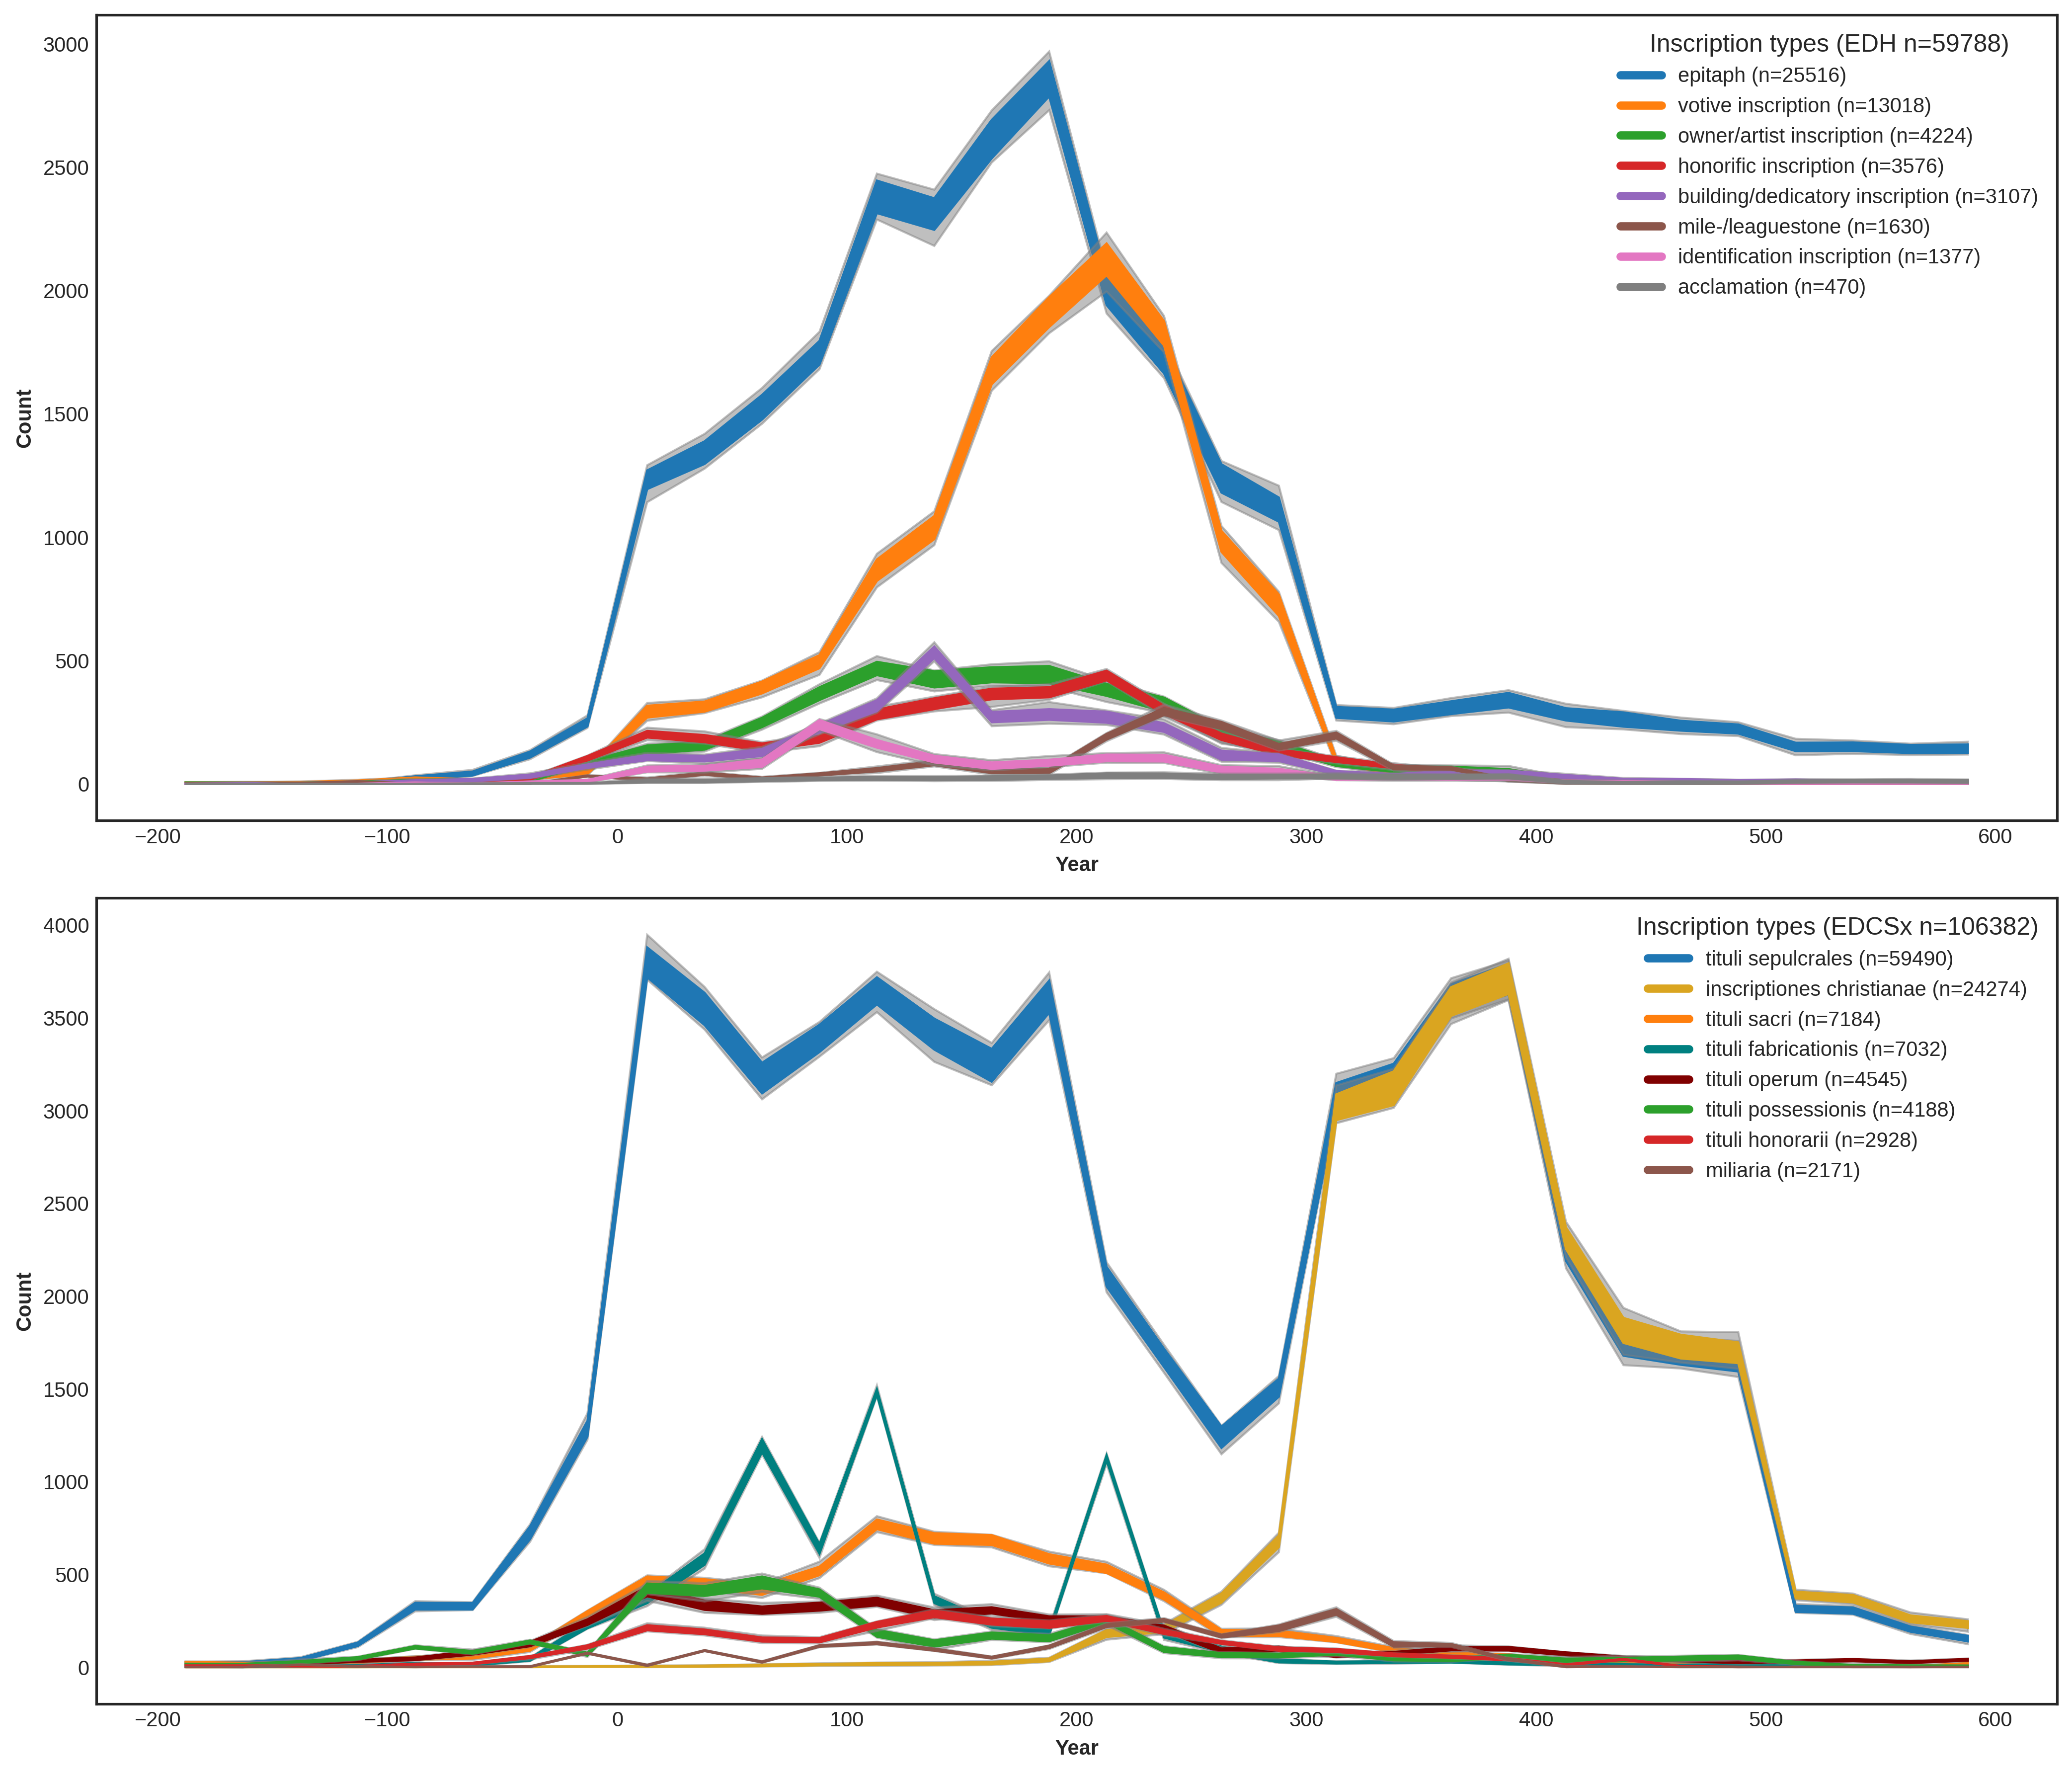

In [13]:
%%time
# Figure 2
# Plot combining EDH and EDCSx
tab_colors_list = list(mcolors.TABLEAU_COLORS.keys())
plt.style.use("seaborn-white")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 10

fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(14, 12), tight_layout=True)

for ins_type_sims, color in zip(simulations_by_type_EDH, tab_colors_list[:len(simulations_by_type_EDH)]):
    tempun.plot_timeblocks_data(ins_type_sims[2], ax=ax1, color=color)

ax1.set_xlabel("Year", weight="bold")
ax1.set_ylabel("Count", weight="bold")
#ax1.set_title(f"Eight most common inscription types over time (EDH, n={len(EDH_dated)})", weight="bold")

markers = [plt.Line2D([0, 0], [0, 0], color=color, lw=4)
           for color in tab_colors_list[:len(simulations_by_type_EDH)]]

legend_labels_EDH = [tup[0] + " (n={})".format(str(tup[1])) for tup in simulations_by_type_EDH]

ax1.legend(markers, legend_labels_EDH, numpoints=1,  
           title=f"Inscription types (EDH n={len(EDH_dated)})", title_fontsize="large", bbox_to_anchor=(1, 1), loc='upper right')

for ins_type_sims, color in zip(simulations_by_type_EDCSx, tab_colors_list_edcs):
    tempun.plot_timeblocks_data(ins_type_sims[2], ax=ax2, color=color)

ax2.set_xlabel("Year", weight="bold")
ax2.set_ylabel("Count", weight="bold")
#ax2.set_title(f"Eight most common inscription types over time (EDCSx, n={len(EDCSx_dated)})", weight="bold")

markers = [plt.Line2D([0, 0], [0, 0], color=color, lw=4)
           for color in tab_colors_list_edcs]
legend_labels_EDCSx = [tup[0] + " (n={})".format(str(tup[1])) for tup in simulations_by_type_EDCSx]

ax2.legend(markers, legend_labels_EDCSx, numpoints=1,
           title=f"Inscription types (EDCSx n={len(EDCSx_dated)})", title_fontsize="large", bbox_to_anchor=(1, 1), loc='upper right')

plt.savefig('Fig2_Typologies_comparison_time.png')

Fig. 2: The eight most common types of inscription in the EDH (n=59,788) and EDCSx (n=106,382) dataset between 200 BC and AD 600. EDH provides one type per inscription, whereas EDCSx can have multiple labels per one inscription. To the groups of private texts belong: epitaphs in EDH/ tituli sepulcrales in EDCS, votive inscriptions in EDH / tituli sacri in EDCSx), owner/artist inscriptions in EDH / tituli possessionis and tituli fabricationis in EDCSx, and tituli christianae in EDCSx. Public inscriptions: building/dedicatory inscriptions in EDH / tituli operum in EDCSx, mile-leaguestone in EDH / miliaria in EDCSx, acclamation in EDCSx. Inscriptions both private and public, depending on context: honorific inscriptions in EDH / tituli honoraria in EDCSx, identification inscriptions in EDH.

Figure 2 shows that the vast majority of inscriptions in both EDH and EDCSx were published by the private sector, on behalf of individuals or private groups, and not on behalf of a public authority. The funerary inscriptions represent the most numerous group of private inscriptions in both datasets ( `epitaph in EDH `, `tituli sepulcrales` in EDCSx), both steeply rising in number, around the time of Augustus (Bodel 2001, 7). The second most numerous group consists of the votive inscriptions in EDH and Christian inscriptions in EDCSx (`inscriptiones christianae`). The votive inscriptions (`tituli sacri`) in EDCSx represent the third most numerous group, with the most inscriptions dated to the second century AD. The trend in the production of votive inscriptions in EDH seems delayed by circa one hundred years when compared to the funerary inscriptions. Funerary and votive inscriptions in EDH and EDCSx, however, start decreasing around the same time, after AD 200. Production continues to decline during the entire third century AD, making it a society-wide phenomenon observable in both data sources. 

In order to test MacMullen’s or Meyer’s hypothesis of inscriptions being co-opted in the competition for social status, further exploration of how social prestige is expressed or generated through the inscriptions before and after AD 212 is needed. While a combination of the temporal modelling with text mining approaches should make this avenue of analysis possible, the combination of close and distant reading is out of the scope of the present paper.

Similarly, quantitative province-specific analysis can help evaluate alternative explanations of the decline in private funerary inscriptions such as the role of infectious diseases and decimation of the population of the Roman Empire. Scholars estimate that the outbreaks of the so-called Antonine Plague in AD 165 and AD 189 killed off between 10 and 30 % of the entire population of the Roman Empire (Littman and Littman 1973, 252; Verhagen 2019; Harper 2016, 806; Duncan-Jones 1996; Duncan-Jones 2018). Few models provide theoretical framework for the effect of plague (potentially combining both the population decline with the increase in relative wages, cf. Scheidel 2018) on inscription production. One could expect that the increased mortality would drive up the demand for funerary inscriptions in the short-term, i.e. at the time of plague. However, population attrition would lead to lower levels of production in the long term, provided that the cultural practice remains unchanged. It might be worthwhile to inspect the effect of infectious diseases on the distribution of private inscriptions empirically and review Duncan-Jones' (Duncan-Jones 1990; Duncan-Jones 1996; Duncan-Jones 2018) results in light of the larger dataset.

Inscriptions published on behalf of political authorities, such as honorific inscriptions, building inscriptions or milestones, are represented in both sources in relatively low quantities and with delayed onset when compared to the group of inscriptions published by the private sphere. The increase of building inscriptions in EDH before the middle of the second century AD may correspond with the provincial building programme of emperor Hadrian (AD 117-138; Wilson 2012, 163). In EDCS, the number of inscriptions related to building activities, `tituli operum`, grew already during the late Republic and the first century AD to around 300 inscriptions per 25 years, possibly related to the Imperial building program in Rome (Bodel 2001, 7). However, the decrease in the number of building inscriptions after AD 200 is slow yet continuous throughout the third century AD and does show any disruption of the trend, as is noticeable in the private inscriptions.

Milestones (`miliaria`) are a category of public inscriptions erected along roads to relate the distance to the administrative centre (`caput viae`) and to provide information on who and when financed the road (re)construction. The trends of milestone production differ from the private inscriptions (in scale kind) as well as between EDH and EDCSx datasets. Roads were already built during the Roman Republic, but milestones survived in comparatively low numbers. With the beginning of the Imperial period, we see an increased production (Bodel 2001, 7), varying between 50 (EDH) and 120 (EDCSx) surviving milestones per 25 years. The growth in the number of milestones is evident in both sources during the third century AD and the beginning of the fourth century AD when up to 300 inscriptions in 25 years were produced in both datasets. The period of increased production of milestones coincides with the extensive building of the road network in the provinces in the second century AD (Laurence 1999, 52; Kolb 2019, 8-10). The milestones from the third and fourth centuries point to maintenance work and reconstruction of the road system, suggesting the provincial institutions maintaining the road network were still active and commissioning inscriptions, although the private epigraphic production in provinces was reduced to a minimum.

Honorific inscriptions, straddling the divide between private and public texts, show a similar trend in production as private inscriptions, observed already by Wilson (Wilson 2012). There is an increase in the first half of the first century AD, followed by steady production of 200-300 honorific inscriptions per 25-year-long time blocks. The peak of production is dated between AD 200-225, followed by a decrease in production. Although Meyer (Meyer 1990) was using funerary rather than honorific inscriptions to illustrate the decline of epigraphic habit, a similar trend in the honorific inscriptions after AD 200 suggests conceptual closeness of both categories. 

Deviating from the public / private distinction are the Christian inscriptions that, however, appear only in EDCSx. The label `inscriptiones christianae` describes a religious context in which the inscription was created rather than its social function and works as an additional category to any traditional type of inscription, such as funerary, votive or ownership inscription. The vast majority (94.4 %) of dated Christian inscriptions in EDCSx are also labelled as funerary (`tituli sepulcrales`), therefore belonging primarily to a private funerary context. As to their temporal trend, the Christian funerary inscriptions deviate from the trends of non-Christian funerary epigraphic production, as they only start to appear after AD 200, when the rest of funerary production declines. On the contrary, the production of Christian funerary inscriptions increases around AD 300 on a massive scale (3000-3500 inscriptions per 25 years). At the same time, the production of all other types of inscriptions is almost non-existent. To position the numbers in a discipline-specific context, it is worth noting that periods after AD 300 may be underrepresented in our sources as Late Antique inscriptions are often collected by specialised projects and databases, and they are missing in the systematic collection in the large digital corpora (Trout 2009, 171; Roueche and Sotinel 2017, 503-507).


The patterns of private and public epigraphic production in EDH and EDCSx are rather different. While the private inscriptions, represented mostly by funerary and votive texts, follow the same pattern as observed by MacMullen and Meyer, the public inscriptions are linked to the activities of political authorities, such as various building programs and maintenance of the road network. Thus, the *epigraphic habit* with its rise and fall at the turn of the third century AD does apply to private production, while the public inscriptions exhibit a gently upward trend that follows the continually growing demand on the maintenance of the technical infrastructure in an expanding Empire. The temporal simulations represented by each line in Figure 2 point to variable levels of temporal uncertainty in private and public inscriptions across both datasets. Private texts, such as funerary and votive inscriptions, contain a higher level of uncertainty, represented by thicker respective trendlines. Public inscriptions are dated with greater precision, which results in narrower trendlines. Public inscriptions often contain more characteristic elements, such as references to historical events, people or calendars, enabling epigraphers to establish a more precise date than private inscriptions

While Figures 1 and 2 allow us to gauge the large picture of the epigraphic categories through time, we need to remember that the dataset has a continental scale and that regional variation is flattened and collated here. Let us bring in the spatial dimension and attempt to review the diachronic patterns in space and by province.

### The extent of epigraphic production in historic eras

In order to better visualise the spatial extent of the epigraphic production in both datasets through time, we create a series of eight maps covering the epigraphic production in the given historical period. Plotting inscriptions by source and historical period makes it possible to both assess the distribution of inscriptions across the Roman Empire and evaluate potential blindspots of the datasets. Such an approach would benefit from the addition of other large-scale longitudinal and geospatial datasets from the Ancient Mediterranean, such as the production of coins, distribution of pottery assemblages, building of road network, settlements patterns and many others (Bowman and Wilson 2009).

For the purpose of spatiotemporal comparison of EDCS and EDH, we use the filtered EDCSx dataset without duplicate records from EDH. We use only inscriptions that are both dated, and their spatial coordinates are located within the borders of the Roman Empire within its largest extent in AD 117 (EDH n=55,431, EDCSx n=90,281 records). For definition of the maximum spatial extent of the Roman Empire in AD 117, we are using the `pleiades-regions-magis-pelagios.geojson`, based on the Barrington Atlas of Greek and Roman World, available through [Pelagios on GitHub](https://raw.githubusercontent.com/pelagios/magis-pleiades-regions/main/pleiades-regions-magis-pelagios.geojson). The subplots in Figure 3 are based on one time-series simulation of the whole EDH and EDCSx datasets (see above). That means that each inscription is randomly assigned to one singular year. In theory, an inscription dated to the second century AD might become part of three subplots, but in practice, it is included only in one of them. Every time we again generate the random dates, the maps slightly change as some inscriptions may shift from one historical period to another; but the general pattern remains the same.


In [72]:
# periods definitions

periods = {  # to avoid overlaps, startdates are postponed by one year, when needed
    "Late Roman Republic": {"startdate": -200, "enddate": -26, "duration": 175},
    "Julio-Claudian dyn.": {"startdate": -27, "enddate": 68, "duration": 95},
    "Flavian dyn.": {"startdate": 69, "enddate": 96,"duration": 28},
    "Nerva-Antonine dyn.": {"startdate": 97, "enddate": 192, "duration": 96},
    "Severan dyn.": {"startdate": 193, "enddate": 235, "duration": 43},
    "Military emperors": {"startdate": 236, "enddate": 284,"duration": 49},
    "Tetrarchy-Constantine I": {"startdate": 285, "enddate": 337,"duration": 53},
    "Late Roman Empire": {"startdate": 338, "enddate": 600,"duration": 263}
}
timeblocks_periods = [(periods[period]["startdate"],
                       periods[period]["enddate"],
                       periods[period]["duration"]) for period in periods]
timeblocks_periods

[(-200, -26, 175),
 (-27, 68, 95),
 (69, 96, 28),
 (97, 192, 96),
 (193, 235, 43),
 (236, 284, 49),
 (285, 337, 53),
 (338, 600, 263)]

In [73]:
def date_to_str(date):
    if date < 0:
        date = str(abs(date)) + " BC"
    else:
        date = "AD " + str(date)
    return date


periods_labels = []
for period in periods.keys():
    start = date_to_str(periods[period]["startdate"])
    end = date_to_str(periods[period]["enddate"])
    periods_labels.append(period + "\n({0}-{1})".format(start, end))
periods_labels

['Late Roman Republic\n(200 BC-26 BC)',
 'Julio-Claudian dyn.\n(27 BC-AD 68)',
 'Flavian dyn.\n(AD 69-AD 96)',
 'Nerva-Antonine dyn.\n(AD 97-AD 192)',
 'Severan dyn.\n(AD 193-AD 235)',
 'Military emperors\n(AD 236-AD 284)',
 'Tetrarchy-Constantine I\n(AD 285-AD 337)',
 'Late Roman Empire\n(AD 338-AD 600)']

In [77]:
# loading shapefile from Pleaides for the largest extent of the Roman Empire, AD 117
# source: https://raw.githubusercontent.com/pelagios/magis-pleiades-regions/main/pleiades-regions-magis-pelagios.geojson
pleiades_regions = gpd.read_file('../data/pleiades_regions.geojson', driver='GeoJSON')
RE_merged = pleiades_regions.unary_union

In [78]:
def get_date_var(randoms):
    try:
        return randoms[0]
    except:
        return None

# selecting one random date out of the 1000 version
EDH_dated["date_var_1"] = EDH_dated["random_dates"].apply(get_date_var)

In [79]:
# modifying coordinates in EDH to fit the script
EDH_dated[['Longitude', 'Latitude']] = pd.DataFrame(EDH_dated.coordinates. tolist(), index=EDH_dated.index)

In [ ]:
%%time
EDH_dated_df_by_periods = []

for period in timeblocks_periods:
    EDH_dated_sample = EDH_dated[EDH_dated["date_var_1"].between(
        period[0], period[1])]
    # tranforming EDH as geodataframe
    EDH_dated_sample = EDH_dated_sample[EDH_dated_sample["Latitude"].notnull()]
    EDH_dated_sample = gpd.GeoDataFrame(EDH_dated_sample, geometry=gpd.points_from_xy(EDH_dated_sample["Longitude"], EDH_dated_sample["Latitude"]))
    # selecting only those dated and within borders of the Empire (the largest extent in AD 117)
    EDH_dated_sample = EDH_dated_sample[EDH_dated_sample.within(RE_merged)]
    EDH_dated_df_by_periods.append(EDH_dated_sample)

In [ ]:
#saving locally for future use
for gdf, n in zip(EDH_dated_df_by_periods, range(len(EDH_dated_df_by_periods))):
    with open("../output/EDH_dated_period_RE_{0}.geojson".format(str(n)), "w") as file: 
        json.dump(sddk.gdf_to_geojson(gdf), file)

In [103]:
%%time
# reading the local geojson back:
EDH_dated_df_by_periods = []
for n in range(8):
    gdf = gpd.read_file("../output/EDH_dated_period_RE_{0}.geojson".format(str(n)), driver="GeoJSON")
    EDH_dated_df_by_periods.append(gdf)

CPU times: user 34.5 s, sys: 1.94 s, total: 36.4 s
Wall time: 37.7 s


In [80]:
# selecting one random date out of the 1000 version
EDCSx_dated["date_var_1"] = EDCSx_dated["random_dates"].apply(get_date_var)

In [81]:
%%time
EDCSx_dated_df_by_periods = []

for period in timeblocks_periods:
    EDCSx_dated_sample = EDCSx_dated[EDCSx_dated["date_var_1"].between(
        period[0], period[1])]
    # transforming EDCSxcon as geodataframe
    EDCSx_dated_sample = EDCSx_dated_sample[EDCSx_dated_sample["Latitude"].notnull()]
    EDCSx_dated_sample = gpd.GeoDataFrame(EDCSx_dated_sample, geometry=gpd.points_from_xy(EDCSx_dated_sample["Longitude"], EDCSx_dated_sample["Latitude"]))
    # selecting only those dated and within borders of the Empire (the largest extent in AD 117)
    EDCSx_dated_sample = EDCSx_dated_sample[EDCSx_dated_sample.within(RE_merged)]
    EDCSx_dated_df_by_periods.append(EDCSx_dated_sample)

CPU times: user 9min 19s, sys: 2.84 s, total: 9min 22s
Wall time: 9min 22s


In [82]:
#saving locally for future use
for gdf, n in zip(EDCSx_dated_df_by_periods, range(len(EDCSx_dated_df_by_periods))):
    with open("../output/EDCSx_dated_period_RE_{0}.geojson".format(str(n)), "w") as file: 
        json.dump(sddk.gdf_to_geojson(gdf), file)

In [83]:
%%time
# reading local geojson back:
EDCSx_dated_df_by_periods = []
for n in range(8):
    gdf = gpd.read_file("../output/EDCSx_dated_period_RE_{0}.geojson".format(str(n)), driver="GeoJSON")
    EDCSx_dated_df_by_periods.append(gdf)

CPU times: user 17.3 s, sys: 528 ms, total: 17.9 s
Wall time: 17.9 s


CPU times: user 18.2 s, sys: 657 ms, total: 18.8 s
Wall time: 18.5 s


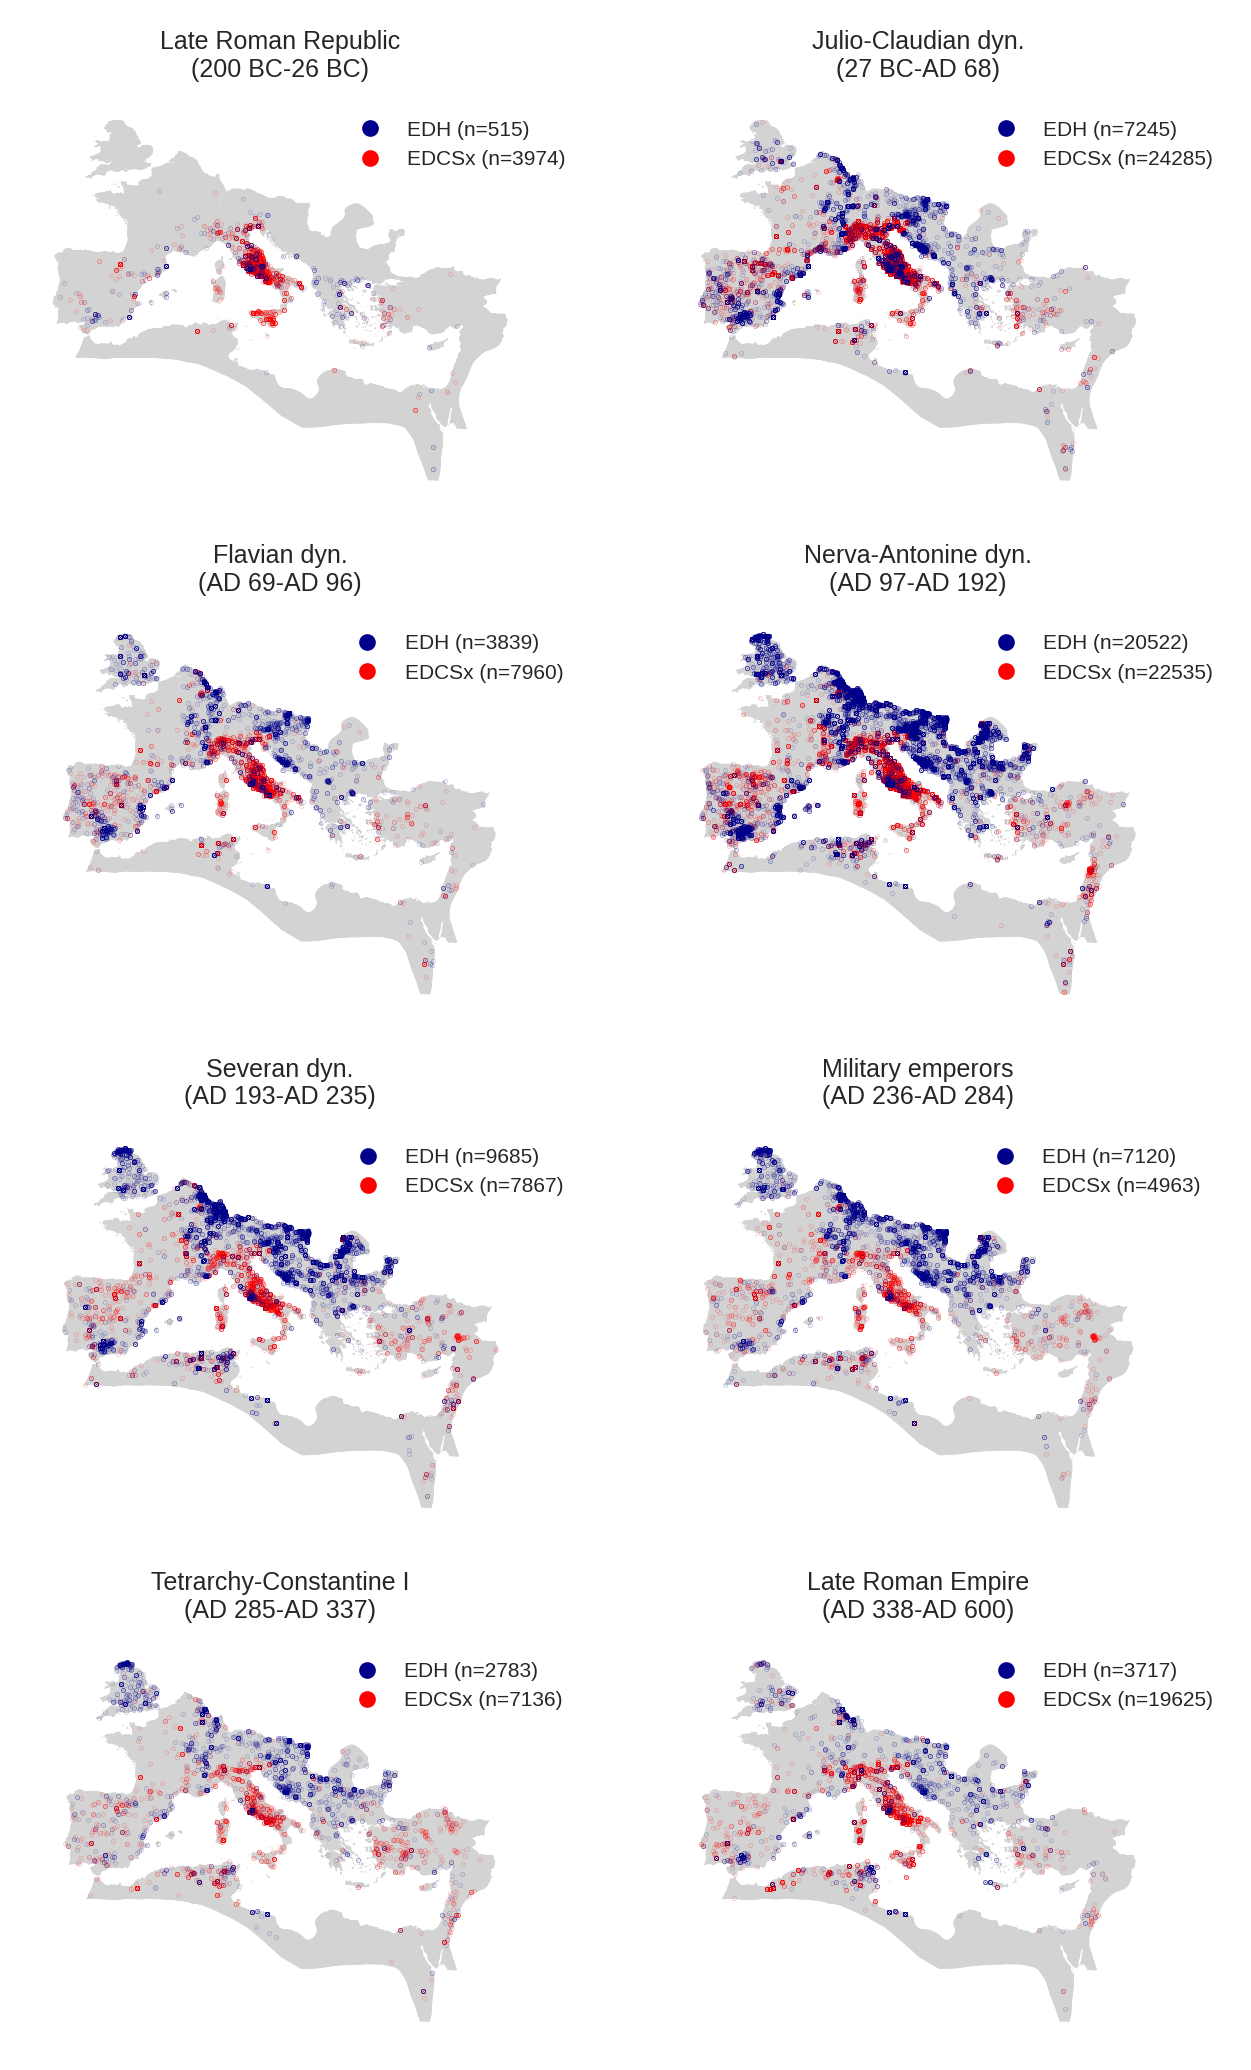

In [104]:
%%time
# Figure 3
# plot all EDH and EDCSx inscriptions with location in 8 plots grouped by period
plt.style.use("seaborn-white")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 10


fig, axs  = plt.subplots(4, 2, figsize=(7, 7), tight_layout=True)

contexts_pct = {}
    
for df_edcs, df_edh, ax, period in zip(EDCSx_dated_df_by_periods, EDH_dated_df_by_periods, axs.ravel(), periods_labels):
    pleiades_regions.plot(ax=ax, color="lightgray")
    df_edcs.plot(markersize=0.04, color="red", ax=ax, alpha=0.2, label=len(df_edcs))
    df_edh.plot(markersize=0.04, color="darkblue", ax=ax, alpha=0.2, label=len(df_edh))
    ax.set_title(period, fontsize=6)
    ax.set_axis_off()
    markers = [plt.Line2D([0,0],[0,0],color=color, marker=".", linestyle="") for color in ["darkblue", "red"]]
    legend_labels = ["EDH (n={0})".format(str(len(df_edh))), 
                     "EDCSx (n={0})".format(str(len(df_edcs)))]
    
    ax.legend(markers, legend_labels, numpoints=1, bbox_to_anchor=(0.6, 1), loc='upper left', fontsize=5)
   
plt.tight_layout(pad=0)
plt.subplots_adjust(wspace=0.0, hspace=0.0)

#fig.suptitle(f'Spatial extent of the epigraphic production by historic period', fontsize=8, fontweight="bold")
plt.savefig('Fig3_Epi_production_periods_EDCSx_EDH.png')

Fig. 3: Comparison of the spatial extent of the epigraphic production in EDH and EDCSx grouped by historical periods. The subplots are results of one time series, treating each inscription as assigned to a singular year within its dating interval. The figure depicts only inscriptions located within the borders of the Roman Empire during its largest extent in AD 117 (EDH n=55,431, EDCSx n=90,281 records).

Although the historical periods have a different duration and thus longer periods will naturally contain more inscriptions, the division to historic periods better corresponds to the temporal interval assigned in the original corpora, i.e. Augustan era (27 BC - AD 14) or Severan dynasty (AD 193 - AD 235). The main advantage of the time series approach is that we can transform inscriptions of the uneven length of their temporal interval, and with the uneven level of uncertainty of their dating, to the same format, and then contrast the extent of the epigraphic production within the historical periods traditionally used by historians, using the data in homogenous format.

Some of the main differences between the two data sources observed in the previous sections are even more visible in Figure 3. We can see the clear spatial focus of EDCSx on Rome and Italic provinces throughout all historical periods, while EDH spatial coverage is more centred around the northern provinces, such as Britannia, both Germanias, Noricum, both Pannonias and Hispania in the south. The areas of Northern Africa, Gaul and Greece, where the *epigraphic habit* of the Severan period has been traditionally observed, do not yield as many inscriptions in our sources.

When contrasted in time, the first observed period of epigraphic activity during the Late Roman Republic (200 BC - 27 BC) shows low levels of activity, mostly in Rome and Italic provinces, Hispania, Greece and Asia Minor. The majority of these places have a tradition of publication of inscriptions in Greek in the previous periods, and some of the trends may be partially documented also in EDH and EDCSx as both contain a small number of Greek inscriptions. The extensive development of provincial epigraphic production around the Limes Romanus is noticeable during the second and early third century AD during the Nerva-Antonine period (AD 97 - AD 192) and Severan period (AD 193 - AD 235) and is predominantly fueled by the data from EDH.

Because of its uneven length, the historical periods may not be the most efficient way to visualize the quantity of epigraphic production. However, traditional periodization still has its stable place in historical narratives, and they provide a wider socio-cultural framework for any historical debate. The comparable format of the temporal data, created by the MCM temporal approach, enabled us to transform the epigraphic records with available spatial coordinates into a more dynamic series of maps, representing spatial trends in eight cumulative snapshots of the past. The main benefit of the spatial visualization of epigraphic data divided into historical periods is clear communication of the spatial distinction between the two datasets and the level of their bias towards collecting inscriptions with a focus on one area (EDCSx) or along the border of the Empire (EDH). By slicing the epigraphic production in time and space, we have discovered a similar spatial bias is present throughout all the subplots, in total representing the 800-year-long time span, varying only in the intensity of epigraphic production in a given period.

### Global vs Local?

In order to investigate spatial variation in the adoption of epigraphic habit, we display epigraphic activity by province, selecting the highest producing provinces for clarity. Can we see similar trends across all provinces, or does location play a role?

For the comparison of provincial trends in time, we use a subset of dated inscriptions from both datasets EDH (n=59,788) and EDCS (n=164,452). We use attributes containing province names in a textual format as provided by the EDH and EDCS, including any potential inconsistencies present in the data (Lotz 2020). 

Figure 4 demonstrates that most dated inscriptions in EDH (n=59,788) come from the provinces on the northern border of the Roman Empire, such as Britannia, both Germanias, Noricum, or from the Adriatic provinces, such as Dalmatia and Pannonias. However, the state of the data entry in EDH and its completeness may play an important role in the order of particular provinces and the trends of their production of inscriptions. As the EDH states on its website, most of the provinces on the northern border of the Empire were entered fully, with the exception of data entry from Germanias and Belgica, where the data entry is still in progress. The provinces in Asia Minor, Northern Africa and in modern-day France are entered into the database only provisionally, and thus the data from EDH is not as representative for them as it is for other provinces. Moreover, the Italic provinces are well under-represented in EDH, with the capital Rome, for example, containing only 2415 inscriptions.

In [7]:
%%time
# Inscriptions by province over time, EDH

simulations_by_prov_len_EDH = []

for ins_type in EDH["province_label_clean"].unique():
    if ins_type != "NULL":
        subset_df = EDH_dated[EDH_dated["province_label_clean"] == ins_type]
        simulations_by_prov_len_EDH.append((ins_type, len(subset_df)))
simulations_by_prov_len_EDH = sorted(
    simulations_by_prov_len_EDH, key=lambda x: x[1], reverse=True)
simulations_by_prov_len_EDH

simulations_by_prov_EDH = []

for ins_type_tup in simulations_by_prov_len_EDH[:10]:
    subset_df = EDH_dated[EDH_dated["province_label"] == ins_type_tup[0]]
    simulations = tempun.timeblocks_from_randoms(
        subset_df, "random_dates", [-200, 600, 25])
    ins_type_N = len(subset_df)
    simulations_by_prov_EDH.append([ins_type_tup[0], ins_type_N, simulations])
simulations_by_prov_EDH = sorted(
    simulations_by_prov_EDH, key=lambda x: x[1], reverse=True)

CPU times: user 1.65 s, sys: 20.3 ms, total: 1.67 s
Wall time: 1.66 s


In [8]:
simulations_by_prov_len_EDH[:20]

[('Dalmatia', 7543),
 ('Germania superior', 6559),
 ('Britannia', 4402),
 ('Pannonia superior', 4182),
 ('Dacia', 3485),
 ('Pannonia inferior', 3109),
 ('Germania inferior', 3003),
 ('Noricum', 2726),
 ('Hispania citerior', 2668),
 ('Roma', 2556),
 ('Baetica', 2431),
 ('Moesia inferior', 1849),
 ('Numidia', 1599),
 ('Moesia superior', 1327),
 ('Africa Proconsularis', 1228),
 ('Macedonia', 1088),
 ('Raetia', 976),
 ('Belgica', 970),
 ('Latium et Campania (Regio I)', 820),
 ('Achaia', 636)]

CPU times: user 795 ms, sys: 228 ms, total: 1.02 s
Wall time: 854 ms


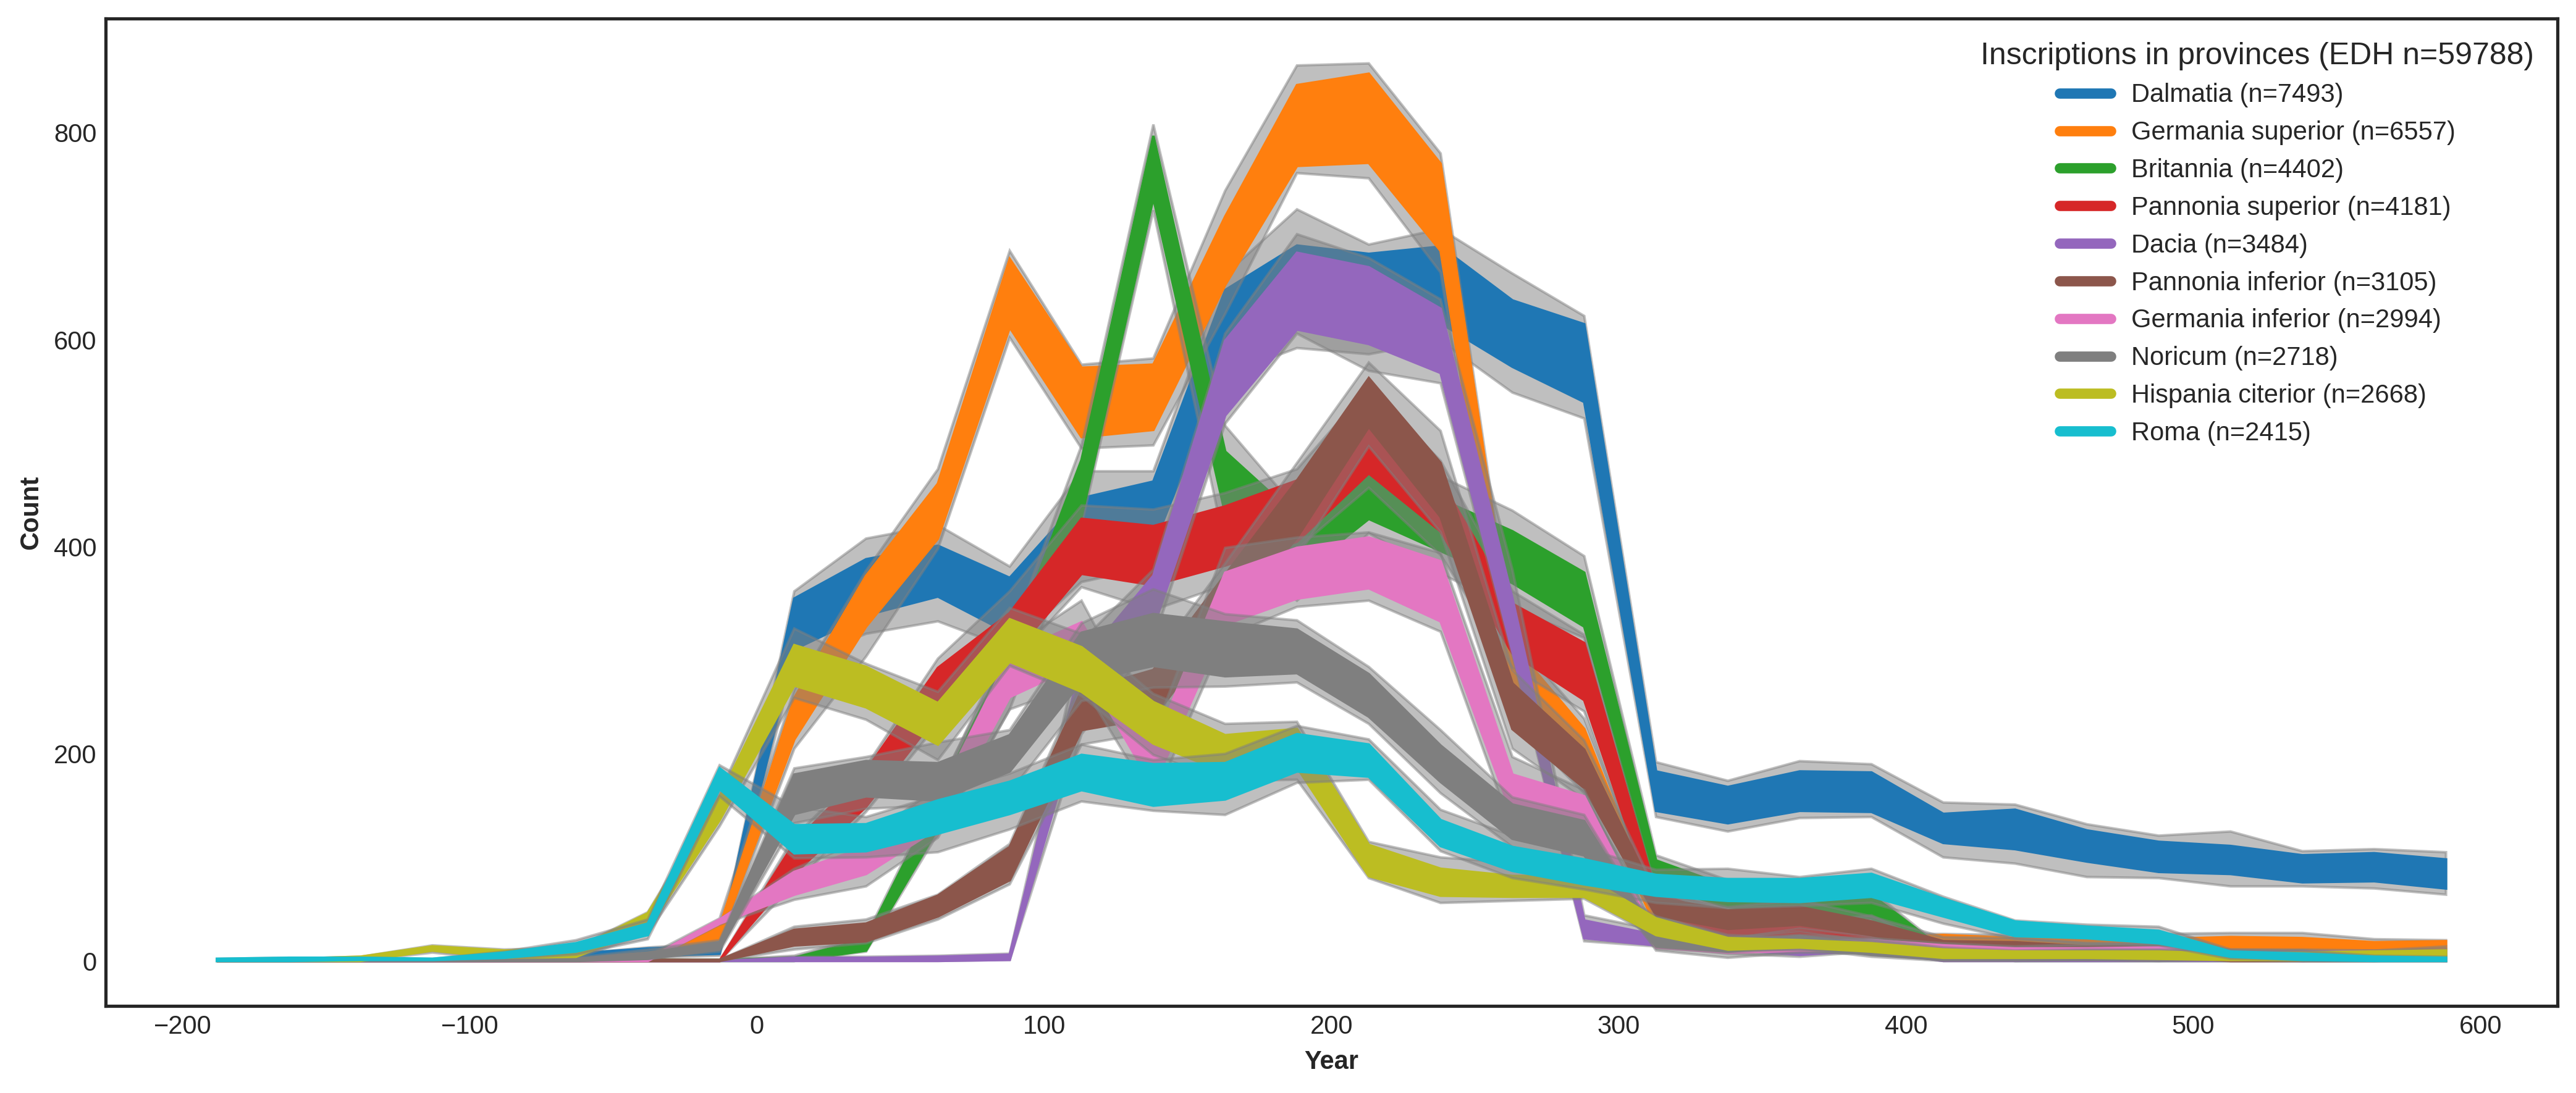

In [52]:
%%time
# Figure 4
# plot of provinces in EDH
tab_colors_list = list(mcolors.TABLEAU_COLORS.keys())
plt.style.use("seaborn-white")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 10

fig, ax = plt.subplots(1, 1, figsize=(14, 6), tight_layout=True)


for ins_type_sims, color in zip(simulations_by_prov_EDH, tab_colors_list[:len(simulations_by_prov_EDH)]):
    tempun.plot_timeblocks_data(ins_type_sims[2], ax=ax, color=color)

ax.set_xlabel("Year", weight="bold")
ax.set_ylabel("Count", weight="bold")
#ax.set_title(f"Provinces with most inscriptions over time (EDH, n={len(EDH_dated)})", weight="bold")

markers = [plt.Line2D([0, 0], [0, 0], color=color, lw=4)
           for color in tab_colors_list[:len(simulations_by_prov_EDH)]]

legend_labels_prov_EDH = [tup[0] + " (n={})".format(str(tup[1])) for tup in simulations_by_prov_EDH]

ax.legend(markers, legend_labels_prov_EDH, numpoints=1,  
           title=f"Inscriptions in provinces (EDH n={len(EDH_dated)})", title_fontsize="large", bbox_to_anchor=(1, 1), loc='upper right')

plt.savefig('Fig4_Epigraphic_production_provinces_EDH.png')

Fig. 4: Ten provinces with the most surviving inscriptions in the period between 200 BC to AD 600, as documented by EDH (n=59,788) dataset. The epigraphic production in most provinces peaks around AD 200, followed by a decline of production around mid-third century AD. Local variants can be observed in some of the provinces, such as Britannia with its peak around AD 150, or Hispania with most inscriptions from the first century AD.

The cacophony of lines in Figure 4 shows that epigraphic production in each of the ten provinces has a different trajectory. Historical circumstances, such as the date and manner of annexation to the Empire, affect the onset and steepness of each curve. The timing of pacification activities, movement of armies, settlement of new populations impact the 25-year trends in each province. The second half of the second century AD marks the highest levels of epigraphic production for most provinces except Britannia, where the production spikes in the first half of the second century AD and Noricum, where the maximum sits at 100 AD. The province with the most numerous inscriptions is Dalmatia (n=7,493). The epigraphic tradition continues here even after AD 300, while in other provinces, it almost disappears around AD 300. The decline of epigraphic production starts after AD 200 in both Germanias, Dacia and Pannonia Inferior, while other provinces, such as Dalmatia, Britannia and partially Pannonia Superior, record the main drop in production only after AD 300.

The numbers of records behind the individual provincial trajectories show that the data in the EDH is relatively uniformly distributed across the sampled provinces. Such distribution is good for comparative analyses of cultural development in the provinces, especially if it is representative of actual published records and if the biases are also equally distributed. However, in the case of selected provinces, the extent of temporal uncertainty in some periods is relatively high, especially at this level of the data-granularity. In particular, it appears that the rate of change between the second half of the second century AD and the first half of the third century might be lower than commonly assumed, especially in Germania Superior, Dacia or Dalmatia. EDCH dataset, on the other hand, contains massive outliers, such as Rome, which has an order of magnitude more data than most other findspots. While the dominance of Rome probably reflects a real difference in the magnitude of production between Rome and other parts of the empire, it subdues other trends in the chart and makes them hard to read. The skewness can be filtered away of course, but it is good to know about for spatial analysis or other studies that require fairly uniform coverage.

The majority of dated inscriptions in the EDCS dataset (n=164,452) in Figure 5 come from Rome and its immediate surroundings, such as the province Latium et Campania, Venetia et Histria, or Samnium. The Italic provinces, and most of all the city of Rome, represent over 45 % of the entire dataset, skewing the attention or any computations in favour of the capital. The non-Italic provinces producing most inscriptions in EDCS are the same ones as in EDH, such as Dalmatia, Hispania Citerior, Germania Superior, Dacia, Pannonia Superior and Britannia. Pannonia Inferior, Germania Inferior and Noricum are, on the other hand missing in the overview of ten provinces with the most inscriptions based on EDCS.

In [43]:
#EDCS by provinces
EDCS_dated["province"] = EDCS_dated["province"].apply(clean_province)

In [44]:
provinces_flatlist_EDCS = [
    el for ellist in EDCS_dated["province"].tolist() for el in ellist]
simulations_by_prov_len_EDCS = list(
    nltk.FreqDist(provinces_flatlist_EDCS).most_common())
simulations_by_prov_len_EDCS[:20]

[('Roma', 46695),
 ('Latium et Campania / Regio I', 17852),
 ('Dalmatia', 7687),
 ('Hispania citerior', 6358),
 ('Venetia et Histria / Regio X', 6019),
 ('Germania superior', 5046),
 ('Dacia', 5008),
 ('Pannonia superior', 4628),
 ('Britannia', 3963),
 ('Samnium / Regio IV', 3703),
 ('Etruria / Regio VII', 3512),
 ('Africa proconsularis', 3460),
 ('Apulia et Calabria / Regio II', 3456),
 ('Pannonia inferior', 3217),
 ('Numidia', 3145),
 ('Baetica', 2866),
 ('Umbria / Regio VI', 2846),
 ('Noricum', 2768),
 ('Transpadana / Regio XI', 2678),
 ('Moesia inferior', 2582)]

In [45]:
%%time
# Inscriptions by Province over time, EDCS

simulations_by_prov_EDCS = []

for ins_type_tup in simulations_by_prov_len_EDCS[:10]:
    subset_df = EDCS_dated[EDCS_dated["province"].apply(
        lambda x: ins_type_tup[0] in x)]
    simulations = tempun.timeblocks_from_randoms(
        subset_df, "random_dates", [-200, 600, 25])
    ins_type_N = len(subset_df)
    simulations_by_prov_EDCS.append(
        [ins_type_tup[0], ins_type_N, simulations])

date_vars_by_instypes = []
for ins_type_tup in simulations_by_prov_len_EDCS[:10]:
    subset_df = EDCS_dated[EDCS_dated["province"].apply(
        lambda x: ins_type_tup[0] in x)]
    date_vars = []
    for n in range(100):
        date_vars.append(
            [date_var[n] for date_var in subset_df["random_dates"] if date_var != None])
    date_vars_by_instypes.append(date_vars)

CPU times: user 6.15 s, sys: 282 ms, total: 6.43 s
Wall time: 6.43 s


In [49]:
tab_colors_list_prov_edcs = [ 
                        'darkturquoise', # Roma
                        'lightcoral', # Latium
                        'tab:blue', # Dalmatia
                        'blue', # Hispania
                        'lime',
                        'tab:orange',
                        'tab:purple',
                        'tab:red',
                        'tab:green',
                        'maroon'] #Samnium

CPU times: user 732 ms, sys: 233 ms, total: 964 ms
Wall time: 694 ms


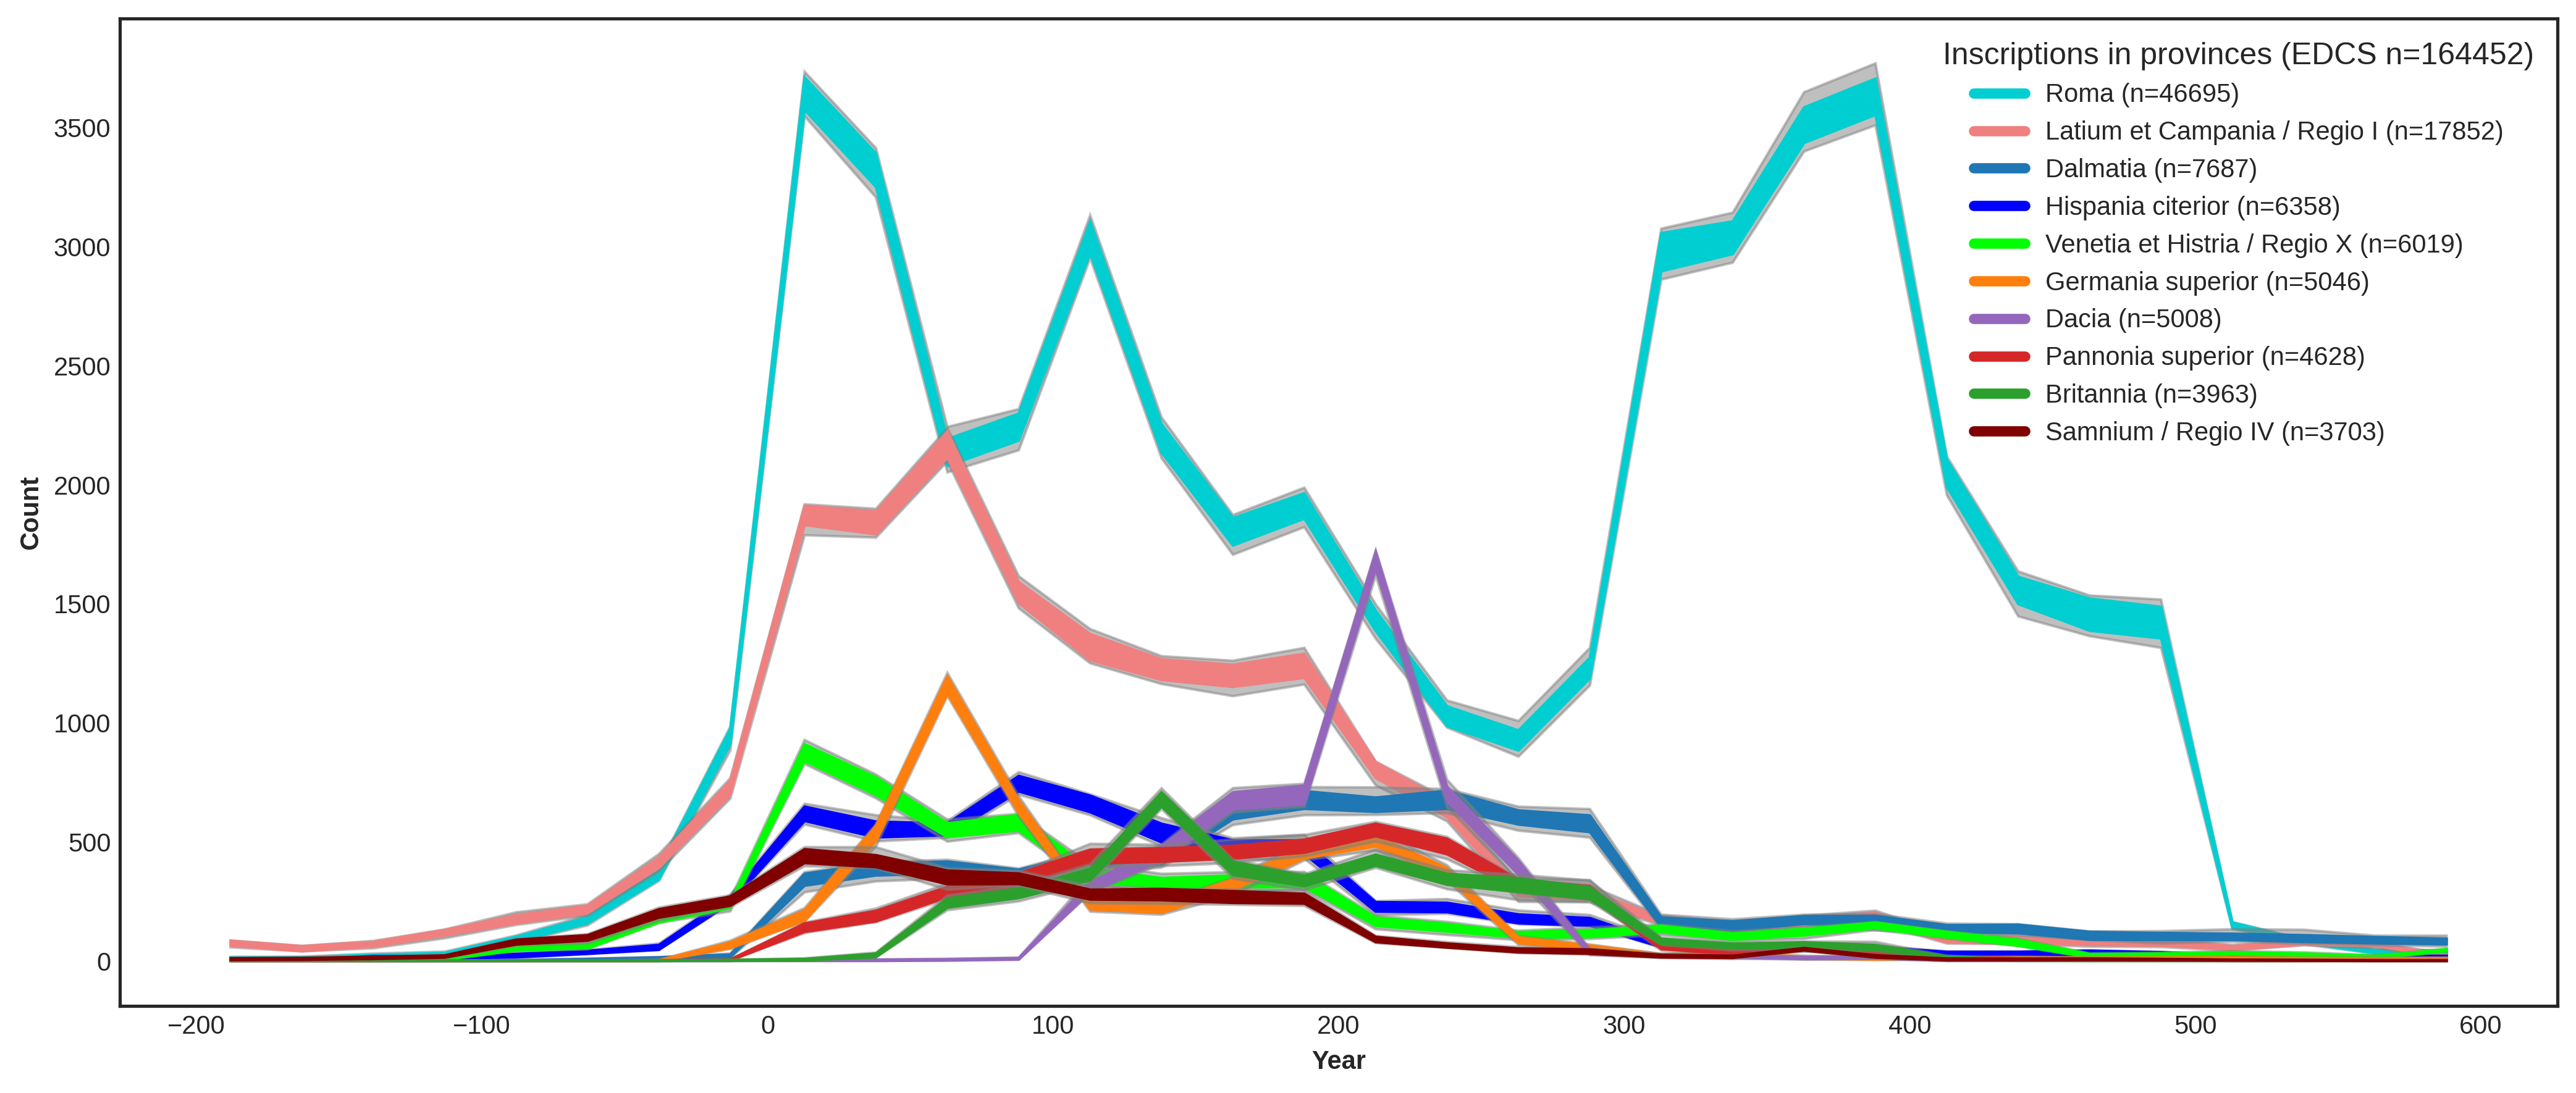

In [53]:
%%time
# Figure 5
# plot of provinces in EDCS
tab_colors_list = list(mcolors.TABLEAU_COLORS.keys())
plt.style.use("seaborn-white")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 10

fig, ax = plt.subplots(1, 1, figsize=(14, 6), tight_layout=True)

for ins_type_sims, color in zip(simulations_by_prov_EDCS, tab_colors_list_prov_edcs):
    tempun.plot_timeblocks_data(ins_type_sims[2], ax=ax, color=color)

ax.set_xlabel("Year", weight="bold")
ax.set_ylabel("Count", weight="bold")
#ax.set_title(f"Provinces with most inscriptions over time (EDCS, n={len(EDCS_dated)})", weight="bold")

markers = [plt.Line2D([0, 0], [0, 0], color=color, lw=4)
           for color in tab_colors_list_prov_edcs]

legend_labels_prov_EDCS = [tup[0] + " (n={})".format(str(tup[1])) for tup in simulations_by_prov_EDCS]

ax.legend(markers, legend_labels_prov_EDCS, numpoints=1,
           title=f"Inscriptions in provinces (EDCS n={len(EDCS_dated)})", title_fontsize="large", bbox_to_anchor=(1, 1), loc='upper right')

plt.savefig('Fig5_Epigraphic_production_provinces_EDCS_all.png')

Fig. 5 Ten provinces with the most surviving inscriptions in the period between 200 BC to AD 600, as documented by EDCS (n=164,452) dataset. The dated inscriptions from Rome (cyan color) represent over 28 % of the entire dataset.

The Italic provinces and Rome are not represented well in EDH, but EDCS provides a good overview of epigraphic production in Rome and its surrounding provinces. The trends in non-Italic provinces follow similar patterns as in EDH, with few exceptions, such as Dacia or Germania Superior. The varying status of documentation of inscriptions from those provinces in both sources likely plays its role: EDCS contains 5008 inscriptions from Dacia, while EDH only has 3484 with approximately one-third of inscriptions missing after AD 200. The same applies to Germania Superior, where EDH contains 6557 inscriptions while EDCS 5046, with the highest discrepancy in the number of inscriptions around the year AD 200 - which also corresponds with the period of maximal production that interests the researchers of the *epigraphic habit*. 

The epigraphic production in Rome sees three periods of growth of the total number of inscriptions: in the first half of the first century AD, around the middle of the second century AD and during the fourth century AD. The province Roma, representing the territory of the capital Rome, produced by far the most dated inscriptions (n=46,695), followed by Latium and Campania (n=15,894). Province Latium et Campania (n=17,852) follows a similar trend as Rome in the first and the second century AD, but not during the fourth century AD. The spatial proximity of both provinces suggests mutual influence on epigraphic trends, Latium being driven by the epigraphic activity of Rome between the first and the third century AD. Thus, the EDCS has value for the study of epigraphic trends in the Italic provinces but may provide a biased overview when studying epigraphic production in non-Italic provinces.

To bring out the unique data in EDCS more clearly, we also plot the inscriptions by province using the filtered EDCSx dataset (n=106,382). Figure 6 now shows only the data that is only present in the EDCS dataset and complementary to EDH. It is useful for comparison with EDH as it is less cluttered now that all the EDH duplicates have been stripped away. As one might expect, EDCSx is even more dominated by the production in Rome and Italic provinces than EDCS. Other differences emerge. For example, the epigraphic production from Germania Superior in the EDCSx dataset (bright orange line) spikes in the second half of the first century AD and ceases almost completely after AD 100. In EDH (orange color on Figure 4), the peak of epigraphic production in Germania comes at the beginning of the third century AD. The third-century peak becomes a secondary bump, partially visible in EDCS (orange color on Figure 5), and is completely missing in the EDCSx dataset.

In [32]:
# Function to transform all inscription types into list form (originally it contains a lot of empty dictionaries etc.)
def clean_province(el):
    if isinstance(el, str):
        return [el]
    elif isinstance(el, dict):
        return []
    else:
        return el


In [33]:
EDCSx_dated["province"] = EDCSx_dated["province"].apply(clean_province)

In [34]:
provinces_flatlist_EDCSx = [
    el for ellist in EDCSx_dated["province"].tolist() for el in ellist]
simulations_by_prov_len_EDCSx = list(
    nltk.FreqDist(provinces_flatlist_EDCSx).most_common())
simulations_by_prov_len_EDCSx[:20]

[('Roma', 43392),
 ('Latium et Campania / Regio I', 15894),
 ('Venetia et Histria / Regio X', 5088),
 ('Hispania citerior', 3213),
 ('Samnium / Regio IV', 3167),
 ('Apulia et Calabria / Regio II', 2750),
 ('Etruria / Regio VII', 2724),
 ('Transpadana / Regio XI', 2519),
 ('Umbria / Regio VI', 2497),
 ('Germania superior', 2424),
 ('Africa proconsularis', 1997),
 ('Sicilia', 1913),
 ('Dacia', 1476),
 ('Numidia', 1406),
 ('Sardinia', 1068),
 ('Picenum / Regio V', 1035),
 ('Lusitania', 960),
 ('Liguria / Regio IX', 942),
 ('Aemilia / Regio VIII', 915),
 ('Belgica', 904)]

In [35]:
%%time
# Inscriptions by Province over time, EDCSx

simulations_by_prov_EDCSx = []

for ins_type_tup in simulations_by_prov_len_EDCSx[:10]:
    subset_df = EDCSx_dated[EDCSx_dated["province"].apply(
        lambda x: ins_type_tup[0] in x)]
    simulations = tempun.timeblocks_from_randoms(
        subset_df, "random_dates", [-200, 600, 25])
    ins_type_N = len(subset_df)
    simulations_by_prov_EDCSx.append(
        [ins_type_tup[0], ins_type_N, simulations])

date_vars_by_instypes = []
for ins_type_tup in simulations_by_prov_len_EDCSx[:10]:
    subset_df = EDCSx_dated[EDCSx_dated["province"].apply(
        lambda x: ins_type_tup[0] in x)]
    date_vars = []
    for n in range(100):
        date_vars.append(
            [date_var[n] for date_var in subset_df["random_dates"] if date_var != None])
    date_vars_by_instypes.append(date_vars)

CPU times: user 4.97 s, sys: 127 ms, total: 5.1 s
Wall time: 5.09 s


In [36]:
# custom pallette for EDCSx provinces, to distinguish the differences between labels
tab_colors_list_prov_edcsx = [ 
                        'darkturquoise', 
                        'lightcoral', 
                        'lime', 
                        'blue',
                        'maroon',
                        'magenta',
                        'yellow',
                        'tomato',
                        'lavender',
                        'orange']

CPU times: user 786 ms, sys: 217 ms, total: 1 s
Wall time: 738 ms


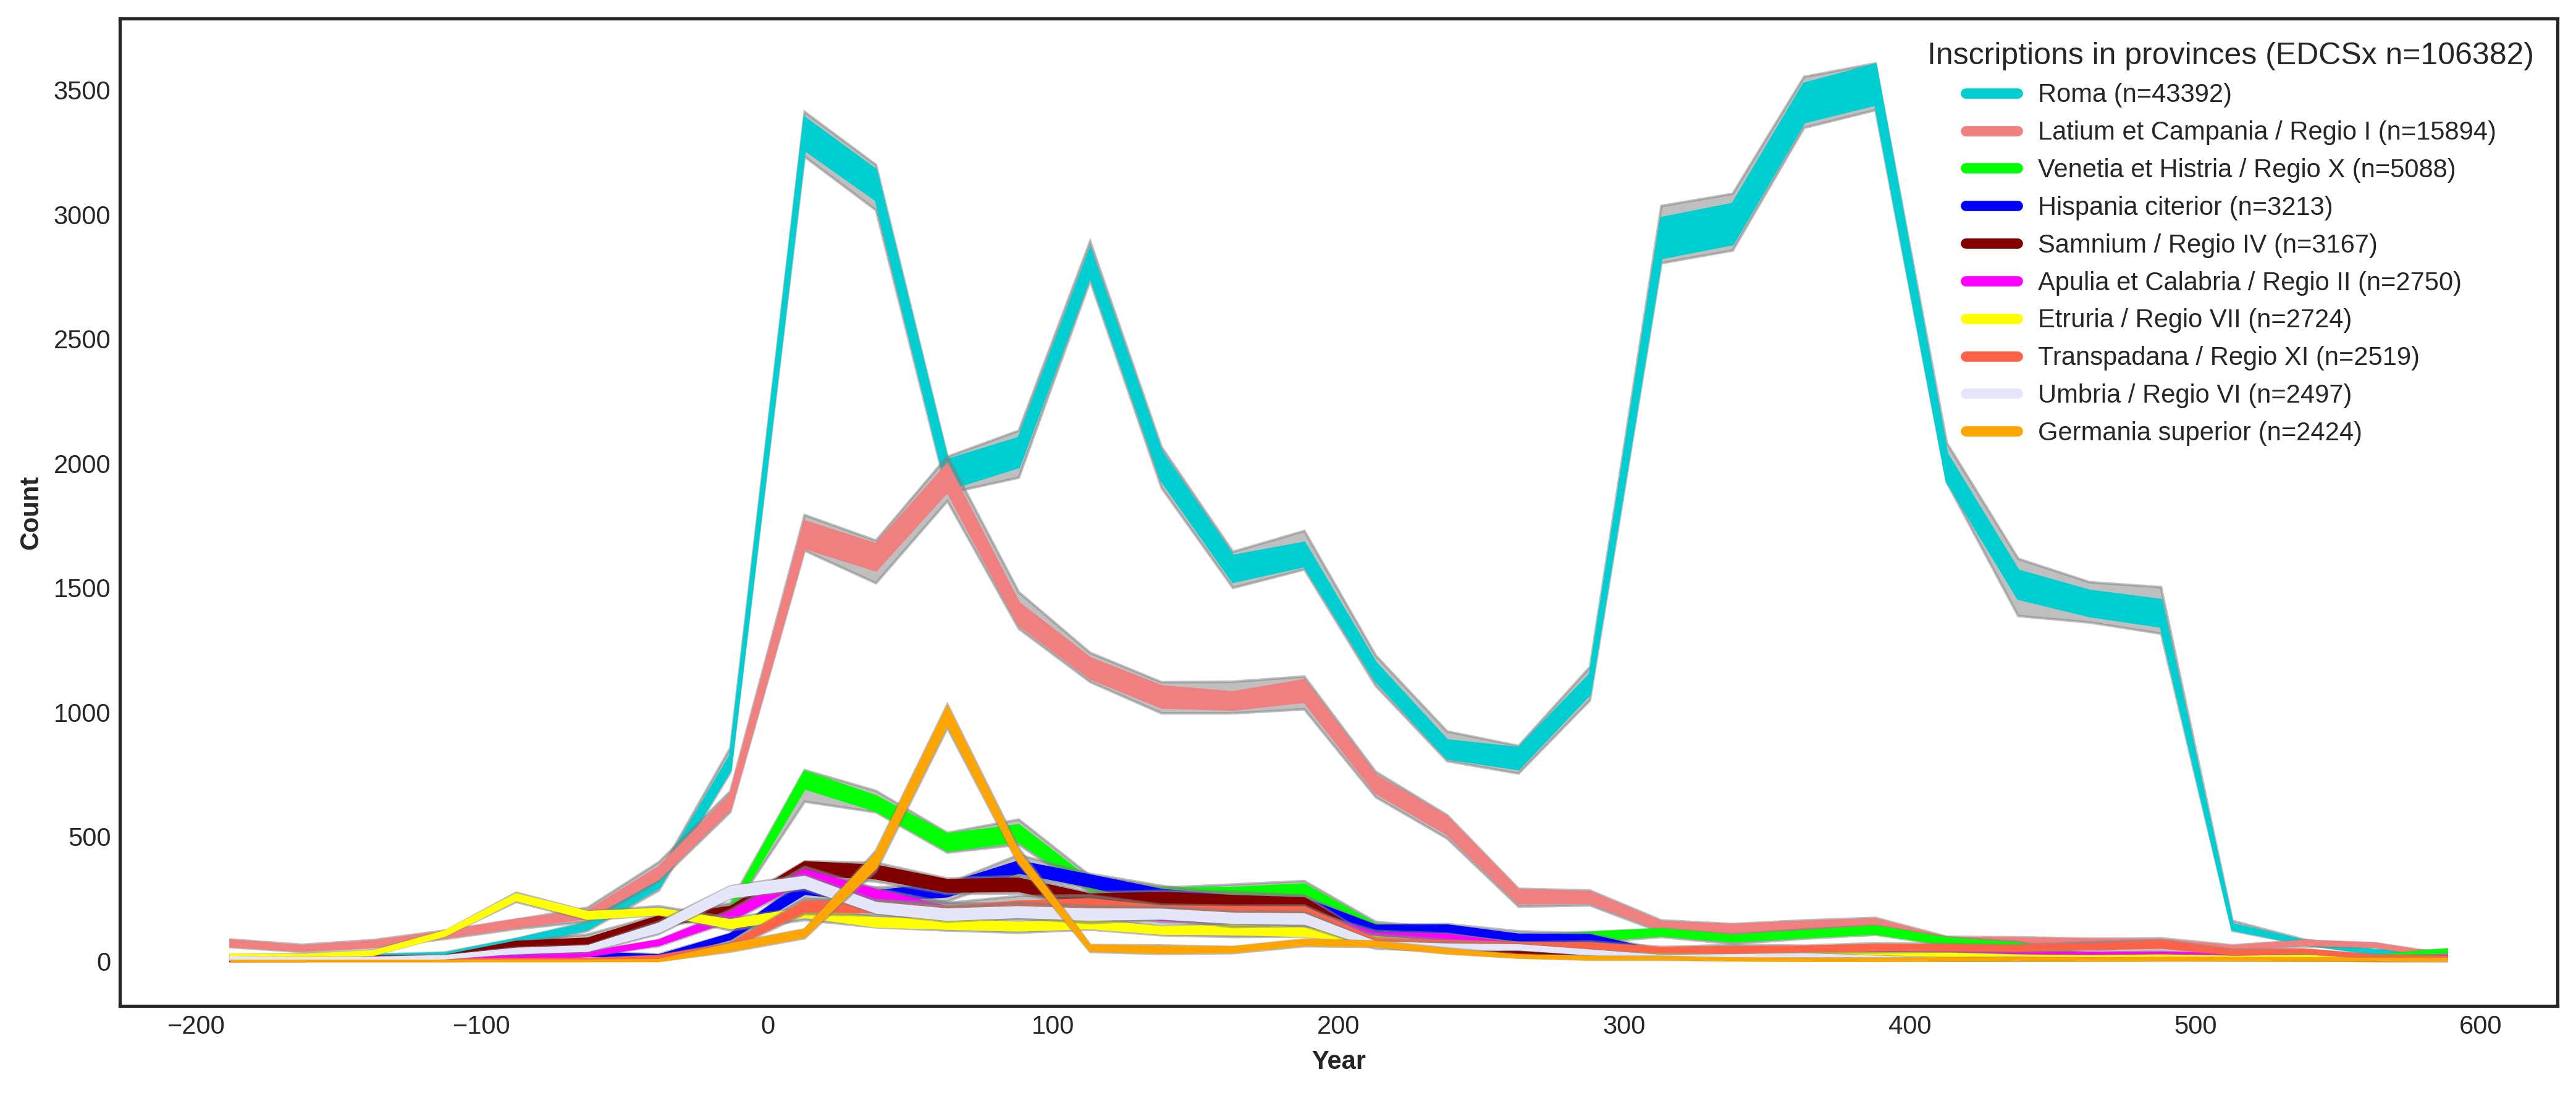

In [54]:
%%time
# Figure 6
# plot of provinces in EDCSx
tab_colors_list = list(mcolors.TABLEAU_COLORS.keys())
plt.style.use("seaborn-white")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 10

fig, ax = plt.subplots(1, 1, figsize=(14, 6), tight_layout=True)

for ins_type_sims, color in zip(simulations_by_prov_EDCSx, tab_colors_list_prov_edcsx):
    tempun.plot_timeblocks_data(ins_type_sims[2], ax=ax, color=color)

ax.set_xlabel("Year", weight="bold")
ax.set_ylabel("Count", weight="bold")
#ax.set_title(f"Provinces with most inscriptions over time (EDCSx, n={len(EDCSx_dated)})", weight="bold")

markers = [plt.Line2D([0, 0], [0, 0], color=color, lw=4)
           for color in tab_colors_list_prov_edcsx]


legend_labels_prov_EDCSx = [tup[0] + " (n={})".format(str(tup[1])) for tup in simulations_by_prov_EDCSx]

ax.legend(markers, legend_labels_prov_EDCSx, numpoints=1,
           title=f"Inscriptions in provinces (EDCSx n={len(EDCSx_dated)})", title_fontsize="large", bbox_to_anchor=(1, 1), loc='upper right')

plt.savefig('Fig6_Epigraphic_production_provinces_EDCSx.png')

Fig. 6: Ten provinces with the most surviving inscriptions in the period between 200 BC to AD 600, as documented by EDCSx (n=106,382) dataset.

The example of Germania Superior confirms that trends can change dramatically depending on which data-source we use and how we select what data. If we have a particular region in mind, we need to consider data quality and completeness before choosing a dataset. Reviewing the figures 4-6 reminds us that spatial visualisation and analysis based solely on EDCS or EDCSx dataset is bound to be heavily skewed towards Rome and Italic provinces. 

#### Zooming on Rome

Both figures 5 and 6 demonstrate that Rome represents an outlier, the area with the highest concentration of inscriptions when compared to other provinces. Inscriptions from Rome represent 40 % of the EDCSx and the trends of epigraphic production over time are distinct from those observed in most provinces. In order to better understand the factors contributing to the temporal distribution of the epigraphic production in Rome, we need to look at individual types of inscriptions over time. As EDH only contains 2,415 dated inscriptions from Rome, EDCSx with a dataset of over 40,000+ inscriptions provides a better picture. Figure 7 is based on dated inscriptions from Rome in the EDCSx dataset (n=43,392), containing at least one or more labels, determining their type.

In [15]:
%%time
# Inscriptions from Rome
Roma_dated = EDCSx_dated[EDCSx_dated["province_list"]=="Roma"]

CPU times: user 70.8 ms, sys: 13.9 ms, total: 84.7 ms
Wall time: 82.1 ms


In [16]:
# Function to transform all inscription types into list form (originally it contains a lot of empty dictionaries etc.)
def clean_inscr_type(el):
    if isinstance(el, str):
        return [el]
    elif isinstance(el, dict):
        return []
    else:
        return el


Roma_dated["inscr_type_list_flat"] = Roma_dated["inscr_type"].apply(
    clean_inscr_type)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [17]:
inscr_types_flatlist_Roma = [
    el for ellist in Roma_dated["inscr_type_list_flat"].tolist() for el in ellist]
simulations_by_type_len_Roma = list(
    nltk.FreqDist(inscr_types_flatlist_Roma).most_common())
simulations_by_type_len_Roma

[('tituli sepulcrales', 33197),
 ('inscriptiones christianae', 20072),
 ('tituli fabricationis', 1258),
 ('tituli sacri', 1173),
 ('tituli operum', 713),
 ('carmina', 567),
 ('tituli possessionis', 399),
 ('tituli honorarii', 145),
 ('leges', 49),
 ('signacula', 30),
 ('termini', 17),
 ('defixiones', 13),
 ('reges', 8),
 ('senatus consulta', 2),
 ('diplomata militaria', 1)]

In [18]:
%%time
# Inscriptions by type over time

simulations_by_type_Roma = []

for ins_type_tup in simulations_by_type_len_Roma[:8]:
    subset_df = Roma_dated[Roma_dated["inscr_type_list_flat"].apply(
        lambda x: ins_type_tup[0] in x)]
    simulations = tempun.timeblocks_from_randoms(
        subset_df, "random_dates", [-200, 600, 25])
    ins_type_N = len(subset_df)
    simulations_by_type_Roma.append(
        [ins_type_tup[0], ins_type_N, simulations])

CPU times: user 2.48 s, sys: 407 ms, total: 2.89 s
Wall time: 2.88 s


CPU times: user 762 ms, sys: 240 ms, total: 1 s
Wall time: 816 ms


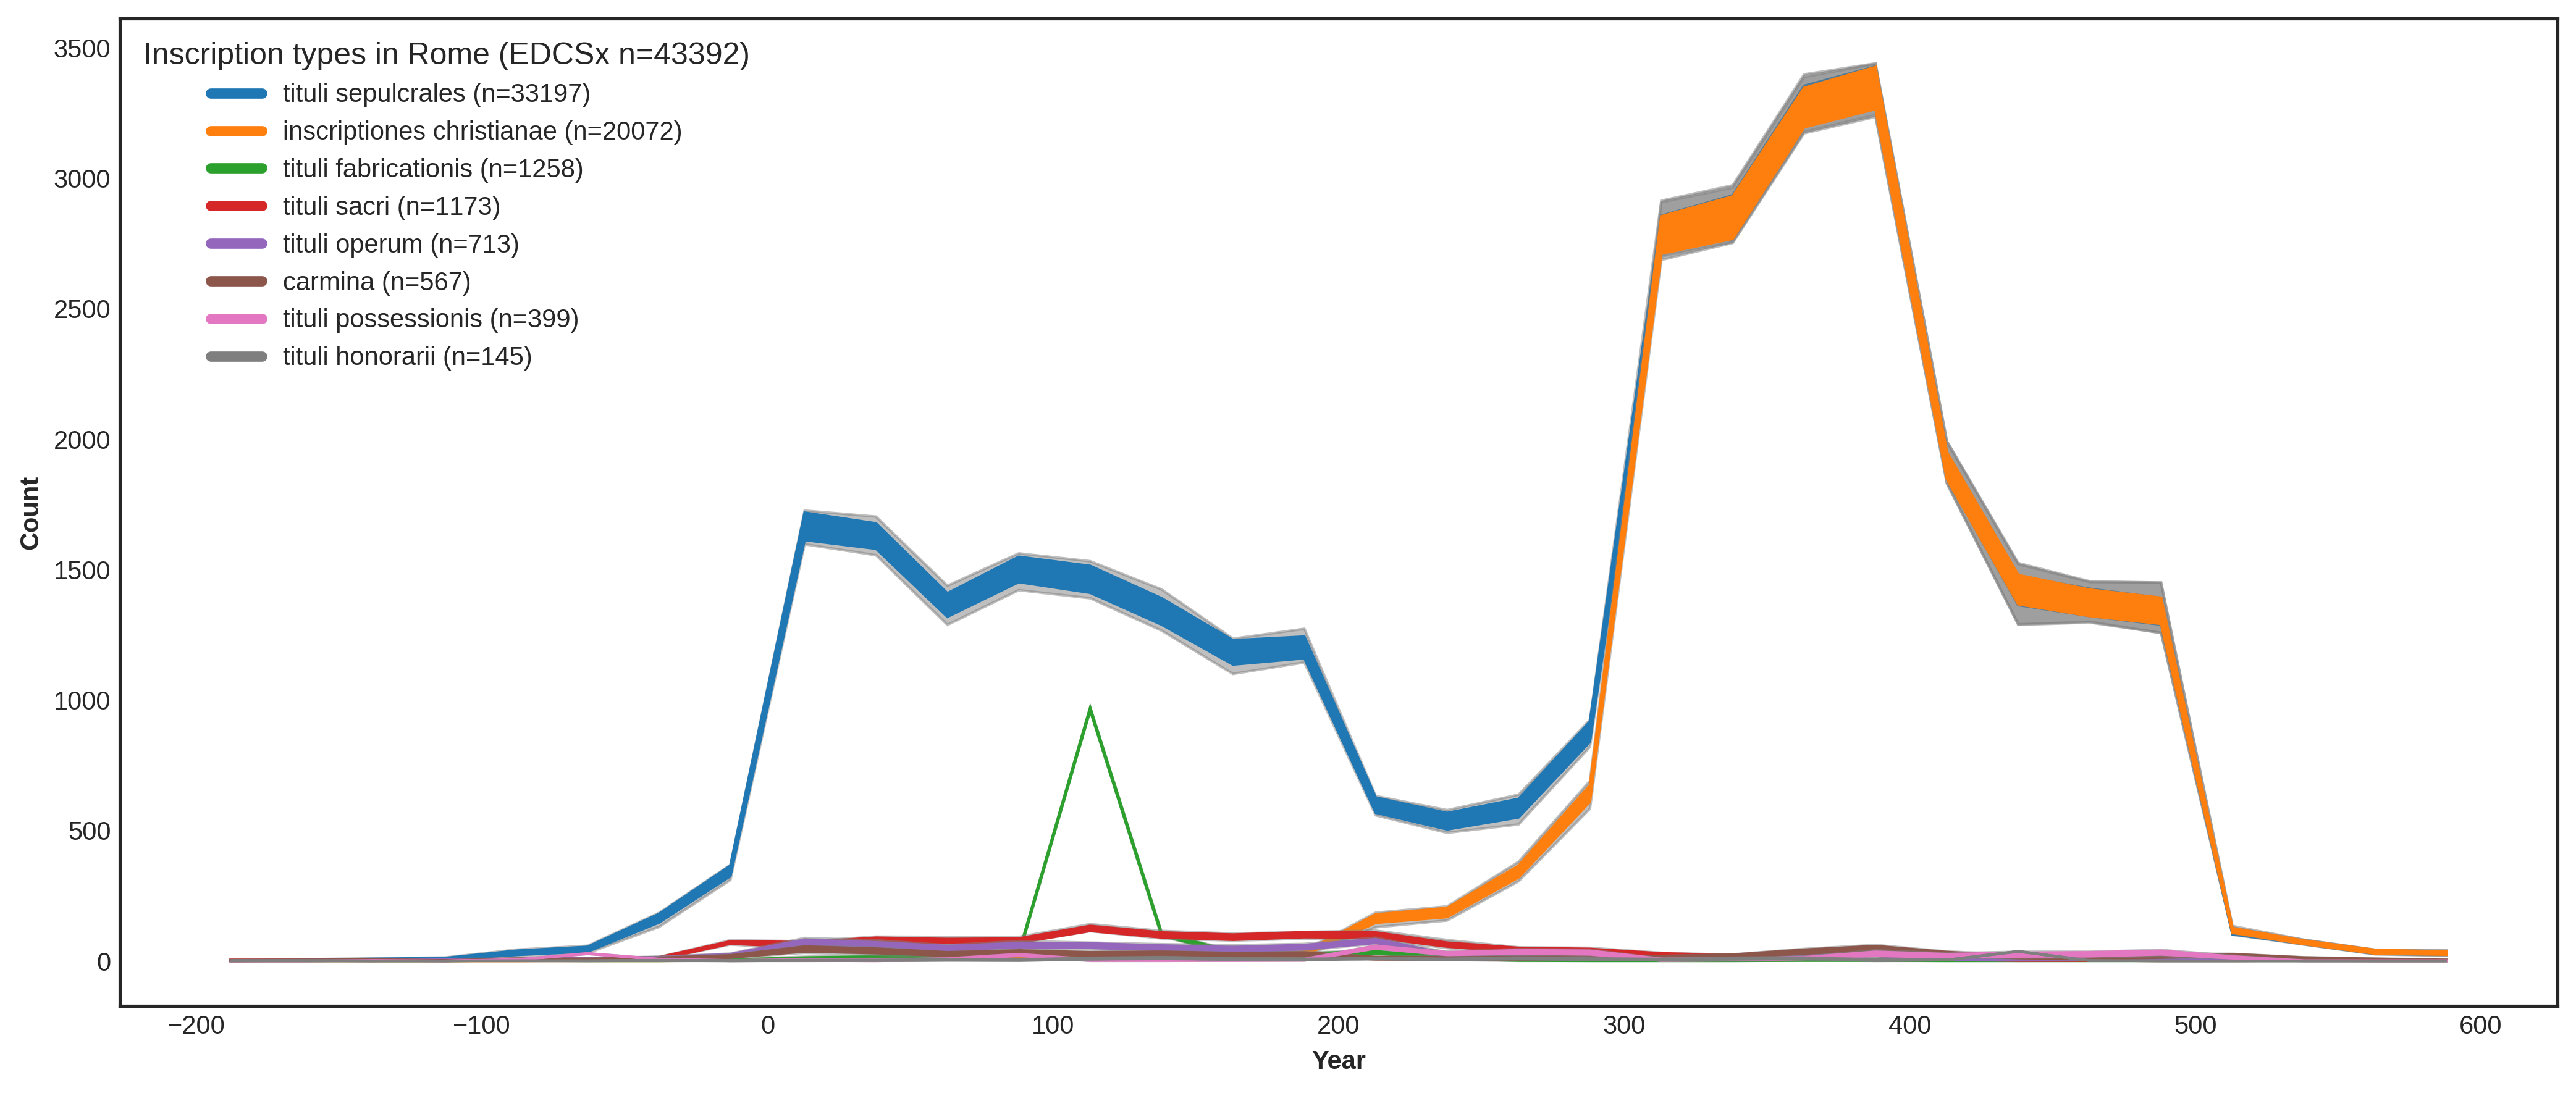

In [19]:
%%time
# Figure 7
# Plot inscriptions from Roma 
tab_colors_list = list(mcolors.TABLEAU_COLORS.keys())
plt.style.use("seaborn-white")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 10

fig, ax = plt.subplots(figsize=(14, 6), tight_layout=True)

for ins_type_sims, color in zip(simulations_by_type_Roma, tab_colors_list[:len(simulations_by_type_Roma)]):
    tempun.plot_timeblocks_data(ins_type_sims[2], ax=ax, color=color)

ax.set_xlabel("Year", weight="bold")
ax.set_ylabel("Count", weight="bold")
#ax.set_title(f"Eight most common inscription types from Rome over time (EDCSx, n={len(Roma_dated)})", weight="bold")

markers = [plt.Line2D([0, 0], [0, 0], color=color, lw=4)
           for color in tab_colors_list[:len(simulations_by_type_Roma)]]

legend_labels_Roma = [tup[0] + " (n={})".format(str(tup[1])) for tup in simulations_by_type_Roma]

ax.legend(markers, legend_labels_Roma, numpoints=1,  
           title=f"Inscription types in Rome (EDCSx n={len(Roma_dated)})", title_fontsize="large", bbox_to_anchor=(0, 1), loc='upper left')

plt.savefig('Fig7_Rome_Typologies_comparison_time_EDCSx.png')

Fig. 7: Typological distribution of epigraphic production from Rome in between 200 BC and AD 600, based on the EDCSx dataset (n=43,392). 

The epigraphic production of Rome is dominated by the funerary inscriptions, representing 76.5 % (33,197) of inscriptions recorded by EDCSx (n=43,392). As seen in Figure 7, the trends of epigraphic production in Rome do not follow the classic pattern of *epigraphic habit*, even if we consider solely the funerary inscriptions (`tituli sepulcrales`). The number of funerary inscriptions grew rapidly during the Augustan era (27 BC - 14 AD), coinciding with the imperial expansion and the supply of quality marble from Carrara (Bodel 2001, 7). The production remained relatively stable until the second half of the second century AD. The third century AD sees a drop in production of funerary inscriptions, but not as stark as observed in other provinces. Around AD 300, the number of inscriptions increased substantially as a result of the production of Christian funerary inscriptions, i.e. inscriptions which are classified both as `tituli sepulcrales` and `inscriptiones christianae`. The inscriptions, labelled by the editors of the EDCS database as Christian, form the second most numerous typological group in Rome (n=20,072). They start to grow around AD 200, but they gain substantial popularity in AD 300. The Christian funerary inscriptions continue to be produced in large numbers between 3000 and 3500 inscriptions per 25 years until AD 400 when their production drops approximately 50 %, and it sharply declines and almost disappears after AD 500 (Bodel 2001, 6). The trends of production of Christian inscriptions in Rome are contemporary, with the building and use of catacombs as a place of funerary rites and a final resting place for Christians (Trout 2009, 175). Yet, as Trout and others correctly point out, the Christian and Late Antiquity inscriptions are published and studied separately from the pre-Constantian inscriptions and thus are likely underrepresented in large epigraphic databases (Trout 2009, 171; Roueche and Sotinel 2017, 503-507).

Rather an irregular pattern can be observed in the EDCSx dataset with `tituli fabricationis`, i.e. inscriptions related to the manufacturing process, also including an artist’s signature or workshop stamps (`sigilla impressa`). Almost all the `tituli fabricationis` from Rome come from the first quarter of the second century AD and are made on pottery (84 %) or lead (11.7 %). The concentration of `tituli fabricationis` in Rome in the first quarter of the second century AD most likely does not suggest an increasing production of pottery in Rome at that time or the sudden change of approaches toward the cultural norms around pottery manufacturing, but it rather corresponds with the archaeological discovery of one or more workshops and subsequent documentation of their stamped products by EDR and EDCS (e.g., Bloch 1947; Bloch 1967). However, it is worth noting that the addition of `tituli fabricationis` is the cause of a spike in the production of inscriptions in Rome in the middle of the second century (cyan color on Figure 5 and 6).

Having the data in a comparable format, we were able to get a more nuanced image of the development in time within regional political subunits, potentially showing local variations within the epigraphic production but also border responses to contemporary societal development. The state of data entry of individual datasets, as well as their regionalized data collection, become a factor seriously impacting any meaningful outcome. Thus, any quantitative research should start with a careful selection of the source, as some sources are more fitting to different types of analysis than others. The EDCSx dataset, for example, is ideal for researching urban environments and the role of urbanism on the character of epigraphic evidence, or how the character of funerary inscriptions changed with Christianity, while the EDH dataset is better suited for analysis of provincial, non-urbanized environments.

## Removing the barriers and opening new avenues in digital epigraphy: Discussion

To summarize the main results of this article, the comparison of data from EDH and EDCS shows that these datasets have very different spatial and temporal coverage. EDH offers data that is fairly uniformly distributed throughout the northwestern provinces of the Empire while they under-represent Rome, the capital. When plotting EDH data in time by findspot, we can see an equitable overview of provinces, each line showing the trajectory of provincial epigraphic production. EDCS is several times larger than EDH, but rather than qualifying the Empire-wide trends seen in EDH, the additional records relate to Rome and Italic provinces, skewing the dataset considerably. This non-uniform distribution becomes clear in EDCS-based charts, where the trends from Rome and Italy overshadow all other data. While EDCS shares most province records with EDH, these are barely perceptible in the visualizations and require filtering to bring out. For studies that require uniform distribution of data across provinces; therefore, EDH is a better alternative. For studies centred on Rome and Italy, be it urban scaling or adoption of Christianity, EDCS will be more suitable.

In terms of temporal developments, the highest levels of epigraphic activity in EDH across most provinces fall into the second century AD despite regional differences in interim peaks and rates of growth and decline. This coincides with rapid socio-economic development along with the northern parts of Limes Romanus (Verhagen et al. 2016, 313; Hanel 2020; Kemkes 2020). The records in EDCS, centred on Italic provinces, show the highest levels of epigraphic activity in the Augustan and Flavian era in the first century AD, showing imperial expansion, and in the fourth century AD, reflecting the building activities in Rome, or underneath in the catacombs respectively (Bodel 2001, 7; Trout 2009, 171).

When considering different factors in the epigraphic production, the type of inscription shows the different trends in private versus the public sphere. The private epigraphic production in the provinces, represented mostly by funerary inscriptions in EDH, follows similar trends as already pointed out by MacMullen (MacMullen 1982) or Meyer (Meyer 1990), with the highest number of preserved inscriptions dated to the turn of the second and the third century followed by a dramatic drop and fairly complete disappearance in the second half of the third century AD, with surviving only ca. 10 % of the maximum production. Private inscriptions in the urbanized environment of Rome and Italy from EDCS show the highest number of preserved inscriptions in the first and the fourth century AD, respectively. The third century AD decline can be observed in the private funerary inscriptions from provinces, but the Severan peaks (Figure 4, 5, and 6) of the epigraphic activity do not occur in Rome (Figure 7) and in Italic provinces only to a limited extent (Figure 5 and 6).

The public inscriptions, such as the building inscriptions, often used to reflect the economic performance of the Empire (Wilson 2009), peak around mid-second century AD in EDH. In EDCS they peak in the first decades of the first century AD, then decline to 75 % of the maximal production and remain relatively stable also in the second century AD. The third century is marked by a gradual decline of building inscriptions in both datasets but this situation is not as dramatic as the disappearance of funerary inscriptions, with the production levels of building inscriptions dropping to ca 50-40 % of the previous century, with steeper decline marked in EDH. The number of preserved milestones, another marker of the maintenance capacity of the Empire, goes up compared to the previous production. Specifically, the number of milestones in both sources is more-or-less constant in both sources until AD 200 when the number of surviving milestones rises twofold in EDCS and threefold in EDH. With the exception of Christian funerary inscriptions from the catacombs of Rome, milestones are the only type of inscriptions with an increasing trend of production after AD 200. Both these trends suggest that the construction of public buildings and public infrastructure continued as was necessary for the survival of the Empire. A possible explanation, that however needs to be verified, may be a conflict induced pressure on quick transfer of the Roman armies across the Empire and their supplies during the third century AD, that resulted in road networks being built and reconstructed, along with the milestones, when other types of activities that tend to reflect in epigraphic record were subdued (Hollenstein 1975; Madzharov 2009).

One must tamper these observations with concern over digital data sources, specifically the state of inscription documentation and the representativeness of each dataset. Data digitisation is a time-consuming and expensive task, and few institutions have the funds to make it complete (Sherratt 2019). Being able to view long-term cumulative trends, we can start asking what may be missing and why? While the EDH authors assert their emphasis on collecting all data from the provinces, the digitization is still [work-in-progress](https://edh-www.adw.uni-heidelberg.de/hilfe/liste/provinzen) and may not be concluded due to the funding cutoff by the end of 2021. On their [website](http://db.edcs.eu/epigr/hinweise/hinweis-de.html), authors of EDCS state the database contains 99.5 % of all published Latin inscriptions (Lotz 2020). Such a number inspires confidence in EDCS as a source. Yet, it brings up additional questions such as what fraction of Latin inscriptions from the Roman Empire have been published or were all publication venues (limited-edition regional journals or museum bulletins) have been consulted? Likewise, the analysis of EDCS shows that inscriptions from Italic provinces and Rome exceed those from other parts of the Empire by an order of magnitude. Is this a real and trustworthy trend, reflecting the longer duration of Roman culture in this part of the world, or is it the result of the bias of Romanists and Early Christianity scholars who preferentially catalogued inscriptions in the core of the Empire?

**Has it been worth it?** Looking at the results above, one could argue that these are moderate achievements that do not present any overwhelming surprises and require more interpretive work to properly explain and contextualize. While beauty is in the eye of the beholder, scepticism here equates to missing the forest for individual trees. While the epigraphic habit serves as a linchpin for the study, the real contribution here is in plotting, for the first time, all of the available EDH and EDCS data in a single graph with comparable scales. The use of digital tools allowed us to work with both datasets efficiently in a reproducible way. Using statistical modelling we placed all dated inscriptions on a temporal axis and quantified their count per given time interval. We could filter and quantify other inscription attributes across time and compare them within and between datasets. Working with datasets in their entirety not only reveals their internal complexity but provides a more transparent route to addressing interpretive and conceptual problems. To make such comparisons possible, we built infrastructure that allows us and other scholars access and inspect entire datasets. While it took us months of time and programming skills to develop, it now takes hours to days and basic computational skills to reuse. The example of the epigraphic habit merely demonstrates the potential of SDAM infrastructure for large-scale historical and epigraphic studies. The real value of this paper is in sharing tools that facilitate access to and streamline large "messy" datasets, removing the barriers to high-quality quantitative epigraphic research.

Removing barriers to quantitative research is essential for both the community and the digital archive owners, as it can mitigate low rates of reuse and combat insufficient research transparency. The epigraphic community has done a tremendous amount of work collecting and digitizing both datasets for Latin epigraphy, Epigraphic Database Heidelberg (EDH) and Epigraphic Database Clauss-Slaby (EDCS). This effort, however, has seen only selective quantified studies, making it hard to justify continued funding of these platforms (for similar discourse in archaeology, see Huggett 2017; Huggett 2016). The need to scrape EDCS before quantitative analysis blocks research. Uncertainty and heterogeneous temporal span of individual inscriptions limits analysis of readily accessible EDH data to barely 10 % of available records. Removing these blockers not only leads to improved knowledge of the past, but facilitates the long-term maintenance and sustainability of the existing digital resources.

Selective use of data, justified by difficulties of reconciling heterogeneous and broad dates, has reduced research transparency in the past. While growing and declining trend lines based on 10-year-dated inscription data propped up arguments for economic well-being (or lack thereof), the authors were rarely able to provide an indication of how reliable these trends truly were. Our work makes it possible to contextualize even tiny subsets within the bulk of epigraphic production, and ascertain how representative and reliable trends in different inscription categories are in their regional and temporal context. This fulfills the requirements of transparent scientific practice which calls on researchers to share complete results including the data that does not support their hypotheses.

Finally, after the creation of major digital data sources, the community also needs to build an ecosystem where data from these disparate sources can be combined and analyzed. Two approaches are possible here. In the first, database owners coordinate and gradually build interoperability between their respective infrastructures. Complexity of this approach rises with the number of participating databases as they all need to agree on standards. Progress towards community standards has been started by the epigraphic community who created a widely accepted EpiDoc XML/TEI format, paving the path towards interoperability of resources (Bodard 2008; Cayless et al. 2010; Elliot et al. 2020). This initiative, started by the EAGLE Europeana Project in 2013, is now carried on by the professional community around Epigraphy.info, who promote and train researchers in the use of the EpiDoc standard so that new epigraphic datasets and databases enable quantitative and synthetic research (Feraudi-Gruénais and Grieshaber 2016; Liuzzo 2018; Bodard et al. 2021). The resulting interoperability with other EpiDoc-based collections, such as EDH, is encouraging, but the overall effort remains limited as it affects only newly-created data. Existing giants, such as the EDCS or PHI ([Packard Humanities Institute’s](https://epigraphy.packhum.org/) project cataloguing all Greek inscriptions; Iversen 2007), lag behind. EDCS, the largest epigraphic database of Latin inscriptions, does not follow the EpiDoc standard and users of its data face time-consuming manual reconciliation. This pushes the goal - the proliferation of synthetic quantitative studies - into the future (Avanzini et al. 2018). Lack of funding, institutional support, and technical feasibility impede engineering towards a common standard, with responsibility resting on the shoulders of database owners. Convergence and dissemination of community standards is likewise slow, driven by volunteers and supported by short-term funding rounds.

An alternative approach is to build federation tools and pipelines alongside the developing datastores. Any sufficiently skilled members of the epigraphic community can build tools to extract the data from multiple data sources, transform them to a standardized form, and then combine them for visualisation and analysis (i.e. Liuzzo 2019). When designed in consultation with domain experts, such pipelines can build interoperability within a domain gradually and reduce the computational barriers to quantified research. Open-source tools improve the sustainability of these pipelines as the burden of upkeep can be shared by many potential maintainers (Raymond 2001). Adherence to the principles of open science and collaboration improves the quality and flexibility of the resulting toolkit, with the goal being a robust and generalized workflow which researchers can adapt to their needs. Demonstrating the feasibility of this approach has been the goal of the present paper. FAIR and Open approach takes time and commitment. We spent a total of six months over the course of a one and a half year scoping, designing and developing tools that would be robust, reproducible, yet accessible to anyone with Carpentries training [(www.carpentries.org)](www.carpentries.org). Having invested into reproducible, generalised and scalable approaches, we can now apply the tools to *any* data that contain spatial and temporal attributes with varying levels of uncertainty, not only Latin epigraphic datasets. Finally, having all analyses scripted and documented, allows anyone to build upon our work without having to reinvent the wheel. Next time you wish to analyze another epigraphic or archaeological dataset, such as the [EDR](http://www.edr-edr.it/en/present_en.php), releasing its public API in mid-2021, you should be able to do it in a matter of days or weeks with this toolkit, reaping the benefit of our investment.

## Conclusions
Large epigraphic datasets represented by EDCS (500,000+ records) and EDH (81,000+ records) have long been accessible online, but most efforts to aggregate and quantify these datasets have been stalled by the technological and methodological challenges of streamlining large amounts of "messy" data. Incompatible data types and data structures combined with temporal uncertainty have restricted reuse to the highest-quality fraction of the available data.

In this paper we deploy a suite of open-source tools that we co-developed with the aim to overcome the challenges of large-scale data aggregation and synthesis. We demonstrate the process of rendering EDH and EDCS datasets amenable for quantified analysis. After making the datasets machine-readable and comparable, we explore the concept of *epigraphic habit*, the variation in epigraphic production through time in different parts of the Roman Empire. Being able to access the datasets in their entirety, we can qualify past interpretations. The traditional trajectory of the epigraphic production reaches a zenith in AD 200-250 and declines sharply thereafter. Such a trend is clearly visible in the private production (funerary inscriptions) of the northwestern provinces. Private inscriptions from Rome and Italic provinces, however, follow an inverse pattern, with the production peaking in the first century AD and then again in the fourth century AD in Rome. The trajectories of public inscriptions in provinces and Rome vary considerably by inscription type, being driven by public works ranging from maintenance to monumental.Thus public building inscriptions peak in the second century AD while road milestones numbers increase into the third and the fourth century AD.

A number of other topics may be revisited with these datasets. Given the preponderance of funerary inscriptions in both EDH (42 %) and EDCSx (56 %) questions of funerary habits, demographic trends as well as inferences of connection between plagues and mortality or diffusion of Christianity may be productively probed. We limit the scope to evaluation of the strengths and weaknesses of the two streamlined datasets, assessing first their suitability for different research questions. 

Temporal analysis of epigraphic production, for example, hinges on at least some temporal information. Such information exists only in ca 33 % of EDCS data (163,380), while the EDH dataset provides temporal data in 69 % of its records (56,281). Majority of records in both datasets date to the second half of the first century BC, but plotting of dated inscriptions by type and findspot shows highly regional and idiosyncratic trends. While EDH contains several hundred of dated records till AD 300, EDCS provides dated inscriptions up to AD 500, as demonstrated by Figure 1.

Both sources provide spatial information in the form of `Latitude` and `Longitude` (labelled `coordinates` in EDH), that can be computationally placed on a map, for 97 % of all records. The spatial coordinates are in most cases extracted from linked open datasets, such as Pleiades or Trismegistos, and thus inevitably contain higher levels of uncertainty than e.g. archaeological datasets, that can still be used for regional and transregional spatial studies, but less for site-based and subregional studies. The EDH prevalently contains Latin inscriptions from the Roman provinces, especially in the northern and northwestern parts of the Roman Empire at the expense of Rome and Italic provinces. Conversely, the majority of EDCS records originate from the Italic provinces with its center in Rome, as can be observed on Figure 3.

Those wishing to analyze inscription texts regardless of date, may be interested in the fact that the EDCS corpus is three-times larger than EDH. It, however, neglects all non-Latin text, even if part of the same inscriptions. Although the EDH corpus of texts is smaller in absolute terms, its quality is higher due to the careful editorial review of individual records. It may thus be more suitable for text analysis and distant-reading. The text mining of inscriptions was previously very limited, because of the Leiden markup for the critical text editions. After the application of cleaning scripts, both datasets now contain the attribute `clean_text_interpretive_word`, that can be subjected to natural language processing and other text mining methods.

Anyone interested in reusing our methods and pipelines can do so without extensive knowledge in programming languages. The scripts can be adapted and applied to literary texts, archaeological datasets or any data with chronological attributes with variable levels of uncertainty. Should you want to inspect, reuse, extend, or build upon our work, see the [hermeneutics section](TBA) as well as our project [GitHub](https://github.com/sdam-au). If scripting is not your cup of tea, but you would like to probe the cleaned datasets, you will find them in Zenodo under the CC-BY-SA 4.0 International License ([EDH](https://zenodo.org/record/4888168), [EDCS](https://zenodo.org/record/4888817)). Our aim is to provide a low-threshold access to computational methods, promote digital literacy amongst epigraphers, historians and any researchers interested in macro-scale analysis of historical data on a regional and supra-regional level.

## Building a Research Pipeline for FAIR and Open Digital Epigraphy
In the current section, we target the first stages of a research lifecycle, such as data access and their streamlining as a key and formative component of any historical analysis. The initial phases of accessing and streamlining the data consume by far the largest amount of project time but yet are not fully recognized as a valid component of *research* by the broader community, or made peripheral in favour of analysis and discussion of results. We have spent over a year and a half continuously building and testing the pipeline to ensure its applicability to any historic dataset, containing spatial and temporal data with high degree of uncertainty. We documented the full research lifecycle in a series of R and Python scripts, with a primary focus on usability and reproducibility within the historical discipline. 

Where possible, we used established tools and solutions, such as [Github](https://github.com/sdam-au/) for code storage and version control, https://sciencedata.dk/ as operational data storage, Zenodo for data publication and archivation. Where we lacked existing tool, we built our own, such as the [sddk](https://pypi.org/project/sddk/) Python package and sdam::request function within the [sdam R](https://github.com/sdam-au/sdam) package to access the storage space on Sciencedata.dk from within our respective coding environment. By developing such tools, we were able to prevent any data duplication while enhancing the collaboration between Python and R users. 

### Step 1: Data access & collection stage
Both EDH and EDCS projects provide a different pathway to the data, bringing both technological and ethical issues that are common to researchers working with digital archives. We have approached the data collection part of the research life-cycle as transparent and FAIR as possible and documented the programmatic access to data in a series of Python scripts.


#### Working with open datasets

The path to the EDH dataset was relatively straightforward since the authors have provided a direct access point to the data via ([API](https://edh-www.adw.uni-heidelberg.de/data/api)) on their website. Moreover, they have clearly stated the conditions of use of the data reuse by providing the [CC BY-SA 4.0 Creative Commons License](https://edh-www.adw.uni-heidelberg.de/data). We will briefly summarize the steps undertaken and link to the relevant scripts.

First, we accessed the Geography API, containing geospatial information of the findspots of inscriptions, and created a JSON file containing geospatial coordinates and names of individual places. For details see the Python script [1_0_py_EXTRACTING-GEOGRAPHIES.ipynb](https://github.com/sdam-au/EDH_ETL/blob/master/scripts/1_0_py_EXTRACTING-GEOGRAPHIES.ipynb)

As a second step, we extracted available attributes for all inscriptions from the EDH API and saved them as a JSON file, see details in the Python script [1_1_py_EXTRACTION_edh-inscriptions-from-web-api.ipynb](https://github.com/sdam-au/EDH_ETL/blob/master/scripts/1_1_py_EXTRACTION_edh-inscriptions-from-web-api.ipynb).

As a third step, we have extracted additional information that was not present in the APIs from EpiDoc XML/TEI files into a separate JSON, using the Python script [1_2_py_EXTRACTION_edh-xml_files.ipynb]
(https://github.com/sdam-au/EDH_ETL/blob/master/scripts/1_2_py_EXTRACTION_edh-xml_files.ipynb) to ensure we are not missing any crucial piece of information.

Next, we have merged all the three JSON files and created an enriched JSON file containing raw data, using the Python script [1_3_py_MERGING_API_GEO_and_XML.ipynb](https://github.com/sdam-au/EDH_ETL/blob/master/scripts/1_3_py_MERGING_API_GEO_and_XML.ipynb). The enriched dataset, containing data from APIs as well as XML/TEI files was later streamlined and cleaned by a series of R scripts, for details see the section on Data cleaning (Step 2).

#### When the resource was not built as open

When accessing the EDCS dataset, we have encountered issues common to any digital researcher. As mentioned in the Data section, the EDCS web interface serves only as an ephemeral gateway to the data, without providing means to save the search results in a reproducible manner, nor programmatic access to the data. Thus, we used a Python-based digital tool, built with the permission of Manfred Clauss and in collaboration with researchers at Macquarie University in Australia (Ballsun-Stanton et al., 2020; [Lat Epig 2.0](https://github.com/mqAncientHistory/EpigraphyScraperNotebook)). The main purpose of the tool is to alleviate some of the technological and methodological inefficiencies of EDCS and enable reproducible and quantitative research of Latin inscriptions to anyone, not requiring any special programming skills. The tool programmatically accesses the web interface of EDCS and saves the search output as a CSV file. Additionally, it preserves the search query metadata in the name of the CSV file in a reproducible manner, so that searches can be replicated and verified. For easy and quick visualisation of the search query results, the tool produces a map of the query results along with the system of Roman Provinces and road network, using the [Digital Atlas of Roman and Medieval Civilizations (DARMC)](https://darmc.harvard.edu/) and [Pleiades](https://pleiades.stoa.org/) open datasets of the ancient Mediterranean. We have used the tool to create individual CSV files for each of the Roman Provinces in EDCS, containing all the inscriptions in a given Province. The resulting dataset from 9 December 2020 contains 500,536 inscriptions.
 

### Step 2: Data cleaning & streamlining

Having access to large digital datasets does not mean they are in the format required by the software or the researcher (Borgman 2015). Digitised datasets often contain typos, inconsistencies, and attributes that are entered incorrectly or data are missing. Structure, categories and concepts differ between component datasets and need to be reconciled and mapped to one another before aggregation. Wrangling data programmatically, let alone manually, consumes considerable time and requires the help of technical specialists. Despite the time-consuming and collaborative effort, the process is rarely visible and credited in publications (or budgeted for in funding proposals), being overshadowed by the emphasis on results. We consider the data collection and processing stage of the data lifecycle crucial for the analysis. We, therefore, render the data gathering and processing stage transparent and reproducible, allowing other researchers to repeat or modify the study. 


We created four R scripts to streamline the descriptive attributes in both datasets and transform them into a comparable format. Furthermore, we used scripts to transform the text of inscriptions to a format suitable for computational analysis. Applying the scripts, we have programmatically modified thirteen attributes for all 81,476 records in the EDH, resulting in the transformation of 1,059,188 pieces of information. In the EDCS dataset, we streamlined six attributes of 500,536 records, resulting in changes made to 3,003,216 pieces of information. Tasks that would take years of manual editing took approximately three months to complete, including extensive testing and iterative improvements to all four cleaning scripts. In the end, we have two large datasets that are ready to be analysed, but we have also created a reproducible and transparent pipeline for the transformation of epigraphic data that can be applied to other research projects.

#### Attribute cleaning and conflation of information

[Script for EDH dataset](https://github.com/sdam-au/EDH_ETL/blob/master/scripts/1_4_r_DATASET_ATTRIBUTES_CLEANING.Rmd) 
[Script for EDCS dataset](https://github.com/sdam-au/EDCS_ETL/blob/master/scripts/1_1_r_EDCS_merge_clean_attrs.Rmd)

In the first stage of the cleaning phase, we needed to streamline the multivalued attributes, which combine multiple distinct types of information, such as start and end date, or region name, ancient and modern place in a single field (e.g., Corinth / Korinthos / Corinthus in EDCS-77500174). Storing multiple types of information in one field may be easy to read for humans but violates the rules of normalisation (requiring one value per field, consistent in type across column) and hinders quantification by computers. We decided to separate the types of information into new attributes but kept the original attributes as a control mechanism. This way, we expanded the size of the original dataset from 51 attributes to 71 in the case of EDH and from 15 to 27 for the EDCS dataset.

We demonstrate the cleaning process on the `type_of_inscription` attribute in EDH, containing an unconstrained textual description of the typological category of an inscription and information about certainty of such categorisation ( represented by a question mark). We have created new attributes containing only the information about the typology of inscriptions in one (`type_of_inscription_clean`) and the certainty information in other (`type_of_inscription_certainty`). This way, we have reduced the number of typological variants by 47,7 % from 44 to 23, making any comparisons and calculations straightforward while keeping the level of uncertainty connected with the typological classification of inscription separate and ready to be quantified.



#### Step 2.2: Regular Expressions as historian's best friend

When dealing with unstructured text, we heavily rely on the use of Regular Expressions as the most efficient yet simple tool for pattern matching (e.g., [https://regex101.com/](https://regex101.com/); packages [stringr for R](https://stringr.tidyverse.org/) and [gsub function in base R](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/grep)). We search for repetitive patterns in the text of the attributes in order to separate different pieces of information so they can be easily computationally accessed in the later stages of the analysis. To illustrate our approach, we extract information providing a level of spatial uncertainty related to the findspot of an inscription from the textual descriptions of the place.

The attribute `findspot_ancient` in EDH contained textual descriptions of the original findspot, with specifications of the level of certainty connected to a particular place name, e.g. *“Cumae, bei”, "Roma?", "Emerita Augusta, aus", "Bracara Augusta - Lucus Augusti, inter", "Epidotium - Ancus, zwischen"*. By eliminating the marker of uncertainty from the `findspot_ancient`, we have managed to streamline the attribute by 35 %: the attribute before cleaning contained 3613 unique values, while after cleaning, we have 2342 unique values of ancient findspot. In order to preserve the information about the level of uncertainty connected with the findspot location, we have then created a new attribute (`finsdpot_ancient_certainty`) containing categorical values corresponding with the certainty of localization. This way, we were able to extract the measure of uncertainty from all records, save it as a separate piece of information for future use.

#### Step 2.3: Cleaning of epigraphic text

[R script for EDH dataset](https://github.com/sdam-au/EDH_ETL/blob/master/scripts/1_5_r_TEXT_INSCRIPTION_CLEANING.Rmd)
[R script for EDCS dataset](https://github.com/sdam-au/EDCS_ETL/blob/master/scripts/1_2_r_EDCS_cleaning_text.Rmd)

After we transformed the attributes containing data of the inscribed object, its origin, date and interpretation, we needed to streamline the text of an inscription in order to be suitable for computer-assisted analysis using text-mining techniques (Tahmasebi and Hengchen 2019). The text of inscriptions from EDH and EDCS in its raw form contains extra text and editorial marks and symbols not present on the original medium, preventing the distant reading methods from producing any meaningful output. The symbols and various types of brackets are marked up in accordance with Leiden epigraphic conventions of critical text-editions communicating the rate of preservation of the text, the level of modern restoration or additional features of the text, such as interpunction or decoration (Dow 1969; McLean 2003, 27-39; Elliott et al. 2020). However useful is the Leiden markup system for the study and historical significance of individual inscriptions, it is highly problematic for any quantified study. Because the human brain is capable of parsing information differently than a computer, understanding the text with Leiden markup may seem straightforward to an epigrapher, but it proves to be a complex task for a computer. For example, the epigrapher understands that the text `[Au]relios` with the brackets is the same as `Aurelios` with no markup. However, for computers `[Au]relios` and `Aurelios` are two different sets of characters and thus are considered as two separate instances in computations. 

Our proposed technical solution eliminates the Leiden markup syntax in a systematic way and produces three different versions of the text designed specifically for their intended type of analysis in EDH, and one version of the text in EDCS. We have created a series of RegEx cleaning blocks that solve one type of markup at a time, and then we have built them in a cleaning function producing the desired outcome for the analysis of the text. The Leiden markup in EDCS slightly deviated from the standard application, providing its own specific syntax, e.g. `[3]` for blank space within a line or `[6]` for a blank line. Thus the cleaning script had to be slightly modified to fit the specifics of EDCS. The sequence of the blocks in the cleaning functions was built specifically for individual datasets and type of intended analysis, but the cleaning blocks were designed rather generically and can be used to clean any text marked according to the Leiden markup conventions, where EpiDoc XML/TEI files are not available, and thus the application of XSLT based transformation is not an option, such as the case of EDCS (Elliott et al. 2017). 

Example of a text of an inscription (EDH HD000003) before cleaning, including Leiden markup syntax: 

`'[P(ublio) M]ummio [P(ubli) f(ilio)] / [Gal(eria) S]isenna[e Ru]/[tiliano] Xv[ir(o) stli]/[tibus iudicandis ---] / [------'`

The text of an inscription was transformed into two main versions:
A conservative version of the text, contained in the attribute `clean_text_conservative`. The aim of the conservative text was to have a text with no markup that is as close to the original inscription as preserved on the durable medium, similar in output as the diplomatic/ majuscule edition in EDH.

`'ummio isenna Xv'`

An interpretive version of the text, contained in the attribute `clean_text_interpretive`. The interpretive version contains the original text as preserved on a medium enriched with editorial interpretations, expanded abbreviations, and reconstructions of the text in order to achieve as rich text of an inscription as possible. For the purpose of text analysis, we have created two versions of the interpretive text:
one with no interpunction between sentences (clean_text_interpretive_word), applied both to EDH and EDCS dataset,
one with preserved interpunction separating individual sentences (clean_text_interpretive_sentence), applied only to EDH dataset.

`'Publio Mummio Publi filio Galeria Sisennae Rutiliano X viro stlitibus iudicandis'`

The cleaning process was designed with the intention of the distant text reading and quantitative analysis of textual contents of inscriptions, and therefore it might not be useful or relevant for studies based on a close-reading of texts. The Leiden markup and additional text or symbols contained approximately one third of the length of text of inscriptions in both datasets, that we were able to eliminate. The cumulative length of texts of all inscriptions in EDH before cleaning was between 1.81 to 1.89 million words, depending on the counting method (base R vs [stringr package](https://CRAN.R-project.org/package=stringr) in R). After the cleaning, the text of all inscriptions contained between 1.14 and 1.22 million words. In the case of the EDCS dataset, the text attribute before the cleaning contained between 7.1 and 6.6 million words, depending on the applied counting method (base R vs stringr package in R). After the cleaning, the text attribute contained between 4.6 and 4.06 million words.

#### Step 2.4: Residual cleaning of EDCS inconsistent HTML markup
The cleaning procedure of the EDCS dataset was more entailed as the attribute `inscription`, produced by the digital tool accessing the EDCS database, contained apart from the text of an inscription also commentary, notes to chronology, bibliographical references and other text, not present on the original inscribed medium. The mixup of the data was caused by the structure of the original EDCS website that was using the same HTML tags for the text of an inscription, its commentary and in some cases, alternate dates. However, the tags were not used consistently for all inscriptions, but appeared only in some records, so tool-wide modifications would not have been helpful. Thus, before we could clean the epigraphic text, we needed to separate the text of an inscription and the non-epigraphic text in a transparent and reproducible way. We developed an additional cleaning function in the [EDCS text cleaning script](https://github.com/sdam-au/EDCS_ETL/blob/master/scripts/1_2_r_EDCS_cleaning_text.Rmd, using Regular Expressions in a specific sequence to extract the redundant information, separate it by category and add it to the original dataset. During the separation process, we have managed to process 1268 inscriptions, representing 0.25 % of the entire dataset in a fraction of time that it would have taken a human to go through all the records and search for potential issues one-by-one. As a direct benefit of the scripted cleaning process to the epigraphic community, we are now able to report back to the creators of the tool accessing the EDCS the ID numbers of problematic records so the tool can be fixed for future researchers.
